<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

# <center><b>Recommendation Algorithms<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>



---
<a name = Section1></a>
# **1. Introduction-Recommendation Systems**
---
**1.a) Apriori**
- Apriori is an algorithm for **frequent itemset** mining and **association rule** learning over relational **databases**.

- It proceeds by **identifying** the **frequent** individual **items** in the database.

- It **extends** those **items** to larger and larger item sets as long as those item sets **appear** **sufficiently** often in the database.

**1.b) Content Based Filtering**
- Creates Recommendations based on Accumalated Informtion.

- It proceeds by creating the **Document Vectors** and then calculate **Similarity Score** on these Vectors.
.
- Value of the **Document Vectors** is calculated by **TF-IDf Vectorizer**

**1.c) Collaborative Based Filtering**

- Creates Recommendations based on Rankings or similarity Scores between Entities .

- It proceeds by calculating the **Cosine Similarity** and then asscociate items with Similarity Score(Range 0-1).
.
- Value 1 indicates 100% similarity(might be the entity itself) and 0 being no similarity.

- Other type of Collaborative Filtering is through **Model Based Approach.(Here Used Singular Value Decomposition and K Means Clustering)**

---
<a name = Section2></a>
# **2. Problem Statement**
---

- These days **data** is being **collected** and stored in **massive** amounts.

- Many **industries** are becoming **interested** in mining **patterns** from their databases.

- The **discovery** of interesting **correlation** relationships among **data** can help many business **decision-making** processes.

- These processes include **catalog design**, **cross-marketing**, and customer
shopping behavior **bold text** analysis.

<center><img src="https://pythondata.com/wp-content/uploads/2019/12/1_ZqZCewk1zZOghuIDqsp6VA.png"></center>

**<h4>Scenario (Hypothetical):</h4>**

- **The Basket**, a **Scotland** based grocery, sells a **fresh** variety of a fresh pieces of **Groceries** to its customers.

- Even though they have a pretty good idea which item sells better with which product.

- But still, they are **looking** for a more **controlled** and **accurate solution** that can improve their Grocery sales.

- To tackle this situation of crisis, Let us see  **How Daily Transaction Data can help them out**

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
! pip install mlxtend

In [1]:
! pip install sweetviz

In [1]:
! pip install pyspark

  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=06937872a3c556927f8aa2f0d841fb750617f5c7b35c98ef05662b915623dbf4
  Stored in directory: c:\users\nimis\appdata\local\pip\cache\wheels\df\88\9e\58ef1f74892fef590330ca0830b5b6d995ba29b44f977b3926
Successfully built pyspark


<a name = Section33></a>
### **3.3 Importing Libraries**

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.1f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importing seaborm library for interactive visualization
import networkx as nx                                               # Importing network graph library
%matplotlib inline
import sweetviz as sv
#-------------------------------------------------------------------------------------------------------------------------------
from mlxtend.frequent_patterns import apriori                       # To train apriori model
from mlxtend.frequent_patterns import association_rules             # To get association mining rules from the model
from mlxtend.preprocessing import TransactionEncoder
#-------------------------------------------------------------------------------------------------------------------------------


import plotly.express as px

from sklearn.feature_extraction.text import TfidfVectorizer         # To perform vectorization over the features
from sklearn.metrics.pairwise import linear_kernel 
from sklearn.metrics.pairwise import cosine_similarity  
from pandas.plotting import parallel_coordinates

from scipy import stats
from sklearn.cluster import KMeans
import pylab as pl




import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The data set is based on the **sales of Grocery items** made in **some random dates** and can be found <a href = "https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/groceries.csv">**link**</a>.

</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 9835 | 1| 693 KB| 

</br>

| Id | Features | Description |
| :-- | :--| :--| 
|01|**Transaction**| Transactions containing list of items.|


In [2]:
data = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/groceries.csv',sep='\n',header=None)[0].str.split(',',expand=True)
print('Data Shape:', data.shape,type(data))
display(data.head(20))

Data Shape: (9835, 32) <class 'pandas.core.frame.DataFrame'>


0                    1                      2  \
0                citrus fruit  semi-finished bread              margarine   
1              tropical fruit               yogurt                 coffee   
2                  whole milk                 None                   None   
3                   pip fruit               yogurt          cream cheese    
4            other vegetables           whole milk         condensed milk   
5                  whole milk               butter                 yogurt   
6                  rolls/buns                 None                   None   
7            other vegetables             UHT-milk             rolls/buns   
8                  pot plants                 None                   None   
9                  whole milk              cereals                   None   
10             tropical fruit     other vegetables            white bread   
11               citrus fruit       tropical fruit             whole milk   
12                       beef                 None                   None   
13                frankfurter           rolls/buns                   soda   
14                    chicken       tropical fruit                   None   
15                     butter                sugar  fruit/vegetable juice   
16      fruit/vegetable juice                 None                   None   
17  packaged fruit/vegetables                 None                   None   
18                  chocolate                 None                   None   
19              specialty bar                 None                   None   

                           3                   4       5      6  \
0                ready soups                None    None   None   
1                       None                None    None   None   
2                       None                None    None   None   
3               meat spreads                None    None   None   
4   long life bakery product                None    None   None   
5                       rice    abrasive cleaner    None   None   
6                       None                None    None   None   
7               bottled beer  liquor (appetizer)    None   None   
8                       None                None    None   None   
9                       None                None    None   None   
10             bottled water           chocolate    None   None   
11                    butter                curd  yogurt  flour   
12                      None                None    None   None   
13                      None                None    None   None   
14                      None                None    None   None   
15                newspapers                None    None   None   
16                      None                None    None   None   
17                      None                None    None   None   
18                      None                None    None   None   
19                      None                None    None   None   

                7       8     9    10    11    12    13    14    15    16  \
0            None    None  None  None  None  None  None  None  None  None   
1            None    None  None  None  None  None  None  None  None  None   
2            None    None  None  None  None  None  None  None  None  None   
3            None    None  None  None  None  None  None  None  None  None   
4            None    None  None  None  None  None  None  None  None  None   
5            None    None  None  None  None  None  None  None  None  None   
6            None    None  None  None  None  None  None  None  None  None   
7            None    None  None  None  None  None  None  None  None  None   
8            None    None  None  None  None  None  None  None  None  None   
9            None    None  None  None  None  None  None  None  None  None   
10           None    None  None  None  None  None  None  None  None  None   
11  bottled water  dishes  None  None  None  None  None  None  None  None   
1

In [3]:
#Create a copy of original data
data1=data.copy(deep=True)

In [4]:
data1=data.copy(deep=True)
data1=data1.stack()

data1=data1.reset_index()

data1.drop(['level_1'],axis=1,inplace=True)
data1.columns=['Transaction','Item']
display(data1.shape,data1.head())
print('Number of unique items=',data1.Item.nunique())

(43367, 2)

Transaction                 Item
0            0         citrus fruit
1            0  semi-finished bread
2            0            margarine
3            0          ready soups
4            1       tropical fruit

Number of unique items= 169


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43367 entries, 0 to 43366
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Transaction  43367 non-null  int64 
 1   Item         43367 non-null  object
dtypes: int64(1), object(1)
memory usage: 677.7+ KB


In [5]:
display(data1.describe().T)
print('Average Item Per Transaction:',data1.describe().T['count'].values[0]/len(data),'\n','Freequency/Item:',data1.describe().T['count'].values[0]/len(set(data1.Item)))


count   mean    std  min    25%    50%    75%    max
Transaction 43367.0 4907.6 2843.1  0.0 2454.5 4827.0 7379.5 9834.0

Average Item Per Transaction: 4.409456024402644 
 Freequency/Item: 256.6094674556213


**Observation:**

- There are total of 169 unique items spread over 9835 transactions.

- On average there are 4 items per transaction

- On average each item has a freequency of 256 no.s in the whole data.

- **Need to work out on good rules that maxmizes sales and generate meaningful associations**



<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** sweetviz package is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column, **statistics** are presented in an interactive HTML report.

In [7]:
sweet_report = sv.analyze(data1)
sweet_report.show_html('sweet_report_MBA.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report_MBA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Observation from the Sweetviz Report:**

- The report shows that there are a total of **2 features** out of which **1 is categorical** and **one is numerical**.

- There are **no missing values**

- There are **11 items** that are bought more frequently in this store ie they appear with **frequency range of 2-6%**  while the rest of the items are less frequently bought ( ie they have a frequency of less than 2%) 




<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

- Let's look at the **sale** of each item in the bakery.

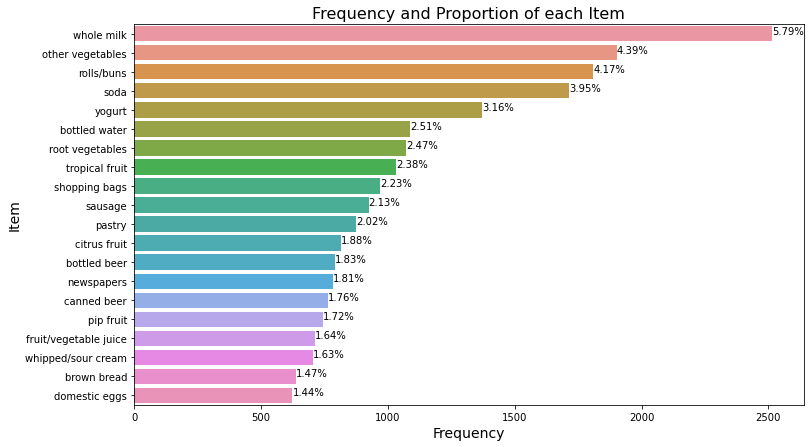

In [6]:
figure = plt.figure(figsize=[12, 7])

ax = sns.countplot(y='Item', data=data1, order=data1['Item'].value_counts().iloc[:20].index)
total = data1.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_width() / total)
  x = p.get_x() + p.get_width() 
  y = p.get_y() + p.get_height() / 2
  ax.annotate(percentage, (x, y))

plt.xlabel('Frequency', size = 14)
plt.ylabel('Item', size = 14)
plt.title('Frequency and Proportion of each Item', size = 16)
plt.show()

**Observation:**

- We can see that **whole milk** and **Other Vegetables** are the **most sold** items in the Grocery Store.

<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---

- Here we will **transform** our **data** concerning the **expected input** by different Recommendation Algorithms.

- Each item inside the "**Item**" feature will **become** a **feature** and "**Transaction**" feature will **become** an **index**.

In [7]:
transactions = [a[1]['Item'].tolist() for a in list(data1.groupby(['Transaction']))]
transactions[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [8]:
te=TransactionEncoder()

In [9]:
te_ary = te.fit(transactions).transform(transactions)

In [10]:
te.columns_[:5]

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics']

In [11]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions.describe()
pf

Instant food products UHT-milk abrasive cleaner artif. sweetener  \
count                   9835     9835             9835             9835   
unique                     2        2                2                2   
top                    False    False            False            False   
freq                    9756     9506             9800             9803   

       baby cosmetics baby food   bags baking powder bathroom cleaner   beef  \
count            9835      9835   9835          9835             9835   9835   
unique              2         2      2             2                2      2   
top             False     False  False         False            False  False   
freq             9829      9834   9831          9661             9808   9319   

       berries beverages bottled beer bottled water brandy brown bread butter  \
count     9835      9835         9835          9835   9835        9835   9835   
unique       2         2            2             2      2           2      2   
top      False     False        False         False  False       False  False   
freq      9508      9579         9043          8748   9794        9197   9290   

       butter milk cake bar candles  candy canned beer canned fish  \
count         9835     9835    9835   9835        9835        9835   
unique           2        2       2      2           2           2   
top          False    False   False  False       False       False   
freq          9560     9705    9747   9541        9071        9687   

       canned fruit canned vegetables cat food cereals chewing gum chicken  \
count          9835              9835     9835    9835        9835    9835   
unique            2                 2        2       2           2       2   
top           False             False    False   False       False   False   
freq           9803              9729     9606    9779        9628    9413   

       chocolate chocolate marshmallow citrus fruit cleaner cling film/bags  \
count       9835                  9835         9835    9835            9835   
unique         2                     2            2       2               2   
top        False                 False        False   False           False   
freq        9347                  9746         9021    9785            9723   

       cocoa drinks coffee condensed milk cooking chocolate cookware  cream  \
count          9835   9835           9835              9835     9835   9835   
unique            2      2              2                 2        2      2   
top           False  False          False             False    False  False   
freq           9813   9264           9734              9810     9808   9822   

       cream cheese    curd curd cheese decalcifier dental care dessert  \
count           9835   9835        9835        9835        9835    9835   
unique             2      2           2           2           2       2   
top            False  False       False       False       False   False   
freq            9445   9311        9785        9820        9778    9470   

       detergent dish cleaner dishes dog food domestic eggs  \
count       9835         9835   9835     9835          9835   
unique         2            2      2        2             2   
top        False        False  False    False         False   
freq        9646         9732   9662     9751          9211   

       female sanitary products finished products   fish  flour  \
count                      9835              9835   9835   9835   
unique                        2                 2      2      2   
top                       False             False  False  False   
freq                       9775              9771   9806   9664   

       flower (seeds) flower soil/fertilizer frankfurter frozen chicken  \
count            9835                   9835        9835           9835   
unique              2                      2           2              2   
top             False                

In [12]:
transactions.head(3)

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   

   baby cosmetics  baby food   bags  baking powder  bathroom cleaner   beef  \
0           False      False  False          False             False  False   
1           False      False  False          False             False  False   
2           False      False  False          False             False  False   

   berries  beverages  bottled beer  bottled water  brandy  brown bread  \
0    False      False         False          False   False        False   
1    False      False         False          False   False        False   
2    False      False         False          False   False        False   

   butter  butter milk  cake bar  candles  candy  canned beer  canned fish  \
0   False        False     False    False  False        False        False   
1   False        False     False    False  False        False        False   
2   False        False     False    False  False        False        False   

   canned fruit  canned vegetables  cat food  cereals  chewing gum  chicken  \
0         False              False     False    False        False    False   
1         False              False     False    False        False    False   
2         False              False     False    False        False    False   

   chocolate  chocolate marshmallow  citrus fruit  cleaner  cling film/bags  \
0      False                  False          True    False            False   
1      False                  False         False    False            False   
2      False                  False         False    False            False   

   cocoa drinks  coffee  condensed milk  cooking chocolate  cookware  cream  \
0         False   False           False              False     False  False   
1         False    True           False              False     False  False   
2         False   False           False              False     False  False   

   cream cheese    curd  curd cheese  decalcifier  dental care  dessert  \
0          False  False        False        False        False    False   
1          False  False        False        False        False    False   
2          False  False        False        False        False    False   

   detergent  dish cleaner  dishes  dog food  domestic eggs  \
0      False         False   False     False          False   
1      False         False   False     False          False   
2      False         False   False     False          False   

   female sanitary products  finished products   fish  flour  flower (seeds)  \
0                     False              False  False  False           False   
1                     False              False  False  False           False   
2                     False              False  False  False           False   

   flower soil/fertilizer  frankfurter  frozen chicken  frozen dessert  \
0                   False        False           False           False   
1                   False        False           False           False   
2                   False        False           False           False   

   frozen fish  frozen fruits  frozen meals  frozen potato products  \
0        False          False         False                   False   
1        False          False         False                   False   
2        False          False         False                   False   

   frozen vegetables  fruit/vegetable juice  grapes  hair spray    ham  \
0              False                  False   False       False  False   
1              False                  False   False       False  False   
2              False                  False   False       False  False   

   hamburger meat  hard cheese  herbs  honey  house keeping products  

In [13]:
f = pf.iloc[0]-pf.iloc[3]

a = f.tolist()

b = list(f.index)


item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])

item = item.sort_values(['Count'], ascending=False).head(100)
item[:10]

Count              Item
166   2513        whole milk
103   1903  other vegetables
123   1809        rolls/buns
139   1715              soda
167   1372            yogurt
13    1087     bottled water
124   1072   root vegetables
158   1032    tropical fruit
134    969     shopping bags
131    924           sausage

In [14]:
fig = px.treemap(item, path=['Item'], values='Count')
fig.show()

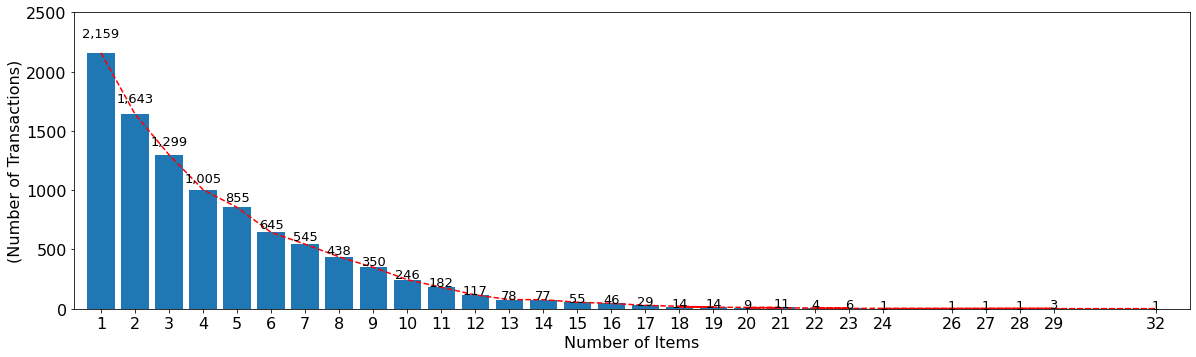

In [15]:
y=data1.groupby('Transaction')['Item'].count().sort_values(ascending=False).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize = (20, 12))
ax=fig.add_subplot(2,1,1)
plt.axis([0.2,33,0,2500])
bar_chart=ax.bar(y.index,y.values)
line_chart=ax.plot(y.index,y.values,linestyle='dashed',color='red')
for bar in bar_chart:
    height=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2.0,height*1.06,s='{:,}'.format(int(height)),horizontalalignment='center',size=13,color='black')
plt.yticks(size=16)
plt.ylabel('(Number of Transactions)',size=16)
plt.xticks(y.index,color = 'black', horizontalalignment = 'center',size=16)
plt.xlabel('Number of Items',size=16)
plt.show()

**Most transactions(2159) have only 1 item followed by 2 (1643) , 3(1299) & 4(1005) items respectively while there is one bill/transaction that has 32 items & 27 items respectively**.

In [16]:
# Transforming data compatible to Recommendations input
transformed_data = data1.groupby(['Transaction','Item'])['Item'].count().unstack().fillna(0)
transformed_data.head()


Item         Instant food products  UHT-milk  abrasive cleaner  \
Transaction                                                      
0                              0.0       0.0               0.0   
1                              0.0       0.0               0.0   
2                              0.0       0.0               0.0   
3                              0.0       0.0               0.0   
4                              0.0       0.0               0.0   

Item         artif. sweetener  baby cosmetics  baby food  bags  baking powder  \
Transaction                                                                     
0                         0.0             0.0        0.0   0.0            0.0   
1                         0.0             0.0        0.0   0.0            0.0   
2                         0.0             0.0        0.0   0.0            0.0   
3                         0.0             0.0        0.0   0.0            0.0   
4                         0.0             0.0        0.0   0.0            0.0   

Item         bathroom cleaner  beef  berries  beverages  bottled beer  \
Transaction                                                             
0                         0.0   0.0      0.0        0.0           0.0   
1                         0.0   0.0      0.0        0.0           0.0   
2                         0.0   0.0      0.0        0.0           0.0   
3                         0.0   0.0      0.0        0.0           0.0   
4                         0.0   0.0      0.0        0.0           0.0   

Item         bottled water  brandy  brown bread  butter  butter milk  \
Transaction                                                            
0                      0.0     0.0          0.0     0.0          0.0   
1                      0.0     0.0          0.0     0.0          0.0   
2                      0.0     0.0          0.0     0.0          0.0   
3                      0.0     0.0          0.0     0.0          0.0   
4                      0.0     0.0          0.0     0.0          0.0   

Item         cake bar  candles  candy  canned beer  canned fish  canned fruit  \
Transaction                                                                     
0                 0.0      0.0    0.0          0.0          0.0           0.0   
1                 0.0      0.0    0.0          0.0          0.0           0.0   
2                 0.0      0.0    0.0          0.0          0.0           0.0   
3                 0.0      0.0    0.0          0.0          0.0           0.0   
4                 0.0      0.0    0.0          0.0          0.0           0.0   

Item         canned vegetables  cat food  cereals  chewing gum  chicken  \
Transaction                                                               
0                          0.0       0.0      0.0          0.0      0.0   
1                          0.0       0.0      0.0          0.0      0.0   
2                          0.0       0.0      0.0          0.0      0.0   
3                          0.0       0.0      0.0          0.0      0.0   
4                          0.0       0.0      0.0          0.0      0.0   

Item         chocolate  chocolate marshmallow  citrus fruit  cleaner  \
Transaction                                                            
0                  0.0                    0.0           1.0      0.0   
1                  0.0                    0.0           0.0      0.0   
2                  0.0                    0.0           0.0      0.0   
3                  0.0                    0.0           0.0      0.0   
4                  0.0                    0.0           0.0      0.0   

Item         cling film/bags  cocoa drinks  coffee  condensed milk  \
Transaction                                                          
0                        0.0           0.0     0.0             0.0   
1                        0.0           0.0     1.0             0.0   
2                        0.0           0.0     0.0             0.0   
3  

In [46]:
#transformed_data=transformed_data.applymap(lambda x:int(x))
#transformed_data.head(10)

- Next, we will **encode** our **feature** with **binary** data only.

- If any **feature** is found to have a value **greater than one** will be **set to 1**.

In [17]:
# Perfoming encoding over features
encoded_data = transformed_data.applymap(lambda x: 0 if x < 1 else 1)

# View encoded data shape
print('Encoded Data Shape:', encoded_data.shape)

# View encoded dataframe
encoded_data.head()

Encoded Data Shape: (9835, 169)


Item         Instant food products  UHT-milk  abrasive cleaner  \
Transaction                                                      
0                                0         0                 0   
1                                0         0                 0   
2                                0         0                 0   
3                                0         0                 0   
4                                0         0                 0   

Item         artif. sweetener  baby cosmetics  baby food  bags  baking powder  \
Transaction                                                                     
0                           0               0          0     0              0   
1                           0               0          0     0              0   
2                           0               0          0     0              0   
3                           0               0          0     0              0   
4                           0               0          0     0              0   

Item         bathroom cleaner  beef  berries  beverages  bottled beer  \
Transaction                                                             
0                           0     0        0          0             0   
1                           0     0        0          0             0   
2                           0     0        0          0             0   
3                           0     0        0          0             0   
4                           0     0        0          0             0   

Item         bottled water  brandy  brown bread  butter  butter milk  \
Transaction                                                            
0                        0       0            0       0            0   
1                        0       0            0       0            0   
2                        0       0            0       0            0   
3                        0       0            0       0            0   
4                        0       0            0       0            0   

Item         cake bar  candles  candy  canned beer  canned fish  canned fruit  \
Transaction                                                                     
0                   0        0      0            0            0             0   
1                   0        0      0            0            0             0   
2                   0        0      0            0            0             0   
3                   0        0      0            0            0             0   
4                   0        0      0            0            0             0   

Item         canned vegetables  cat food  cereals  chewing gum  chicken  \
Transaction                                                               
0                            0         0        0            0        0   
1                            0         0        0            0        0   
2                            0         0        0            0        0   
3                            0         0        0            0        0   
4                            0         0        0            0        0   

Item         chocolate  chocolate marshmallow  citrus fruit  cleaner  \
Transaction                                                            
0                    0                      0             1        0   
1                    0                      0             0        0   
2                    0                      0             0        0   
3                    0                      0             0        0   
4                    0                      0             0        0   

Item         cling film/bags  cocoa drinks  coffee  condensed milk  \
Transaction                                                          
0                          0             0       0               0   
1                          0             0       1               0   
2                          0             0       0               0   
3  

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---



# **8.a) Apriori Algorithm**

- At First, we will **create** a set of **association rules** to **determine** the optimal **thresholds** for support and confidence. 

- If **`min_support`** is set **too low** then the **execution time** will **increase** and will end up having **a lot of rules** (**unnecessary**), Automate the Minimum Support generation to get the maximum confidence.

- Further, we will use **`confidence`** for __sorting__ purposes and to find the most important relationships.



confidence= [0.8857142857142858] support= [0.003]


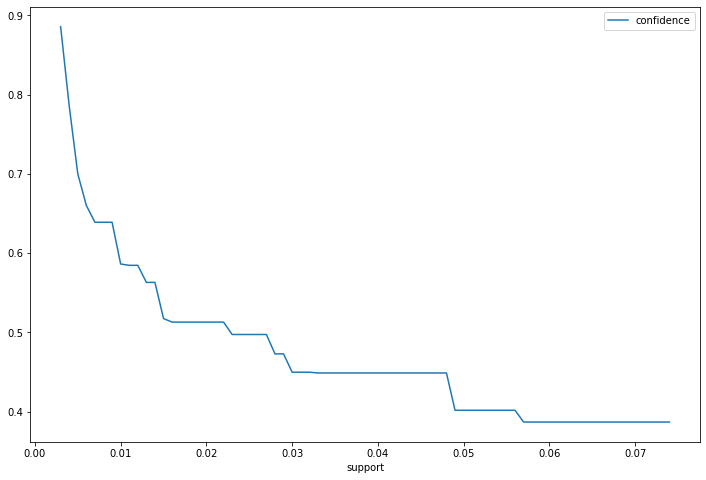

Wall time: 1min 15s


In [18]:
%%time
#processing may take 4 to 5 min, if get error try increasing min variable in .001 step
bb=[0]
ll=[0]
minisupport=0.003  #min==.00x indictes .x% minimum value of support, the min x value depend on the memeory capabilities of system
wow=np.arange(minisupport, 0.25, 0.001)
cc=pd.DataFrame()
ii=[]
l=[]

for i in wow:
    frequent_itemsets1  =  apriori(encoded_data, min_support =i, use_colnames = True)
    rules1  =  association_rules(frequent_itemsets1, metric = "lift", min_threshold =1)
    ii.append(i)
    l.append(rules1.confidence.max())
    
    
    
    if (rules1.confidence.max()>bb[0]):
        bb[0]=(rules1.confidence.max())
        ll[0]=(i)
cc['support']=ii
cc['confidence']=l
        
print('confidence=',bb,'support=',ll)
cc.plot(x='support',y='confidence',figsize=(12,8));
plt.show()


---
 **Important**: The **minisupport** variable here indicate minimum support, as we lower the minimum support we are observing higher confidence in items or higher association between items but this also mean higher number of rules that are generated for the given Apriori Algorithm and with min=.3%,my system memory requirements are only this much capable to not throw an error. **If still get error on minisupport=.003, try increasing in steps of .001 until it shows a graph. **

In [19]:
cc.iloc[:5]['support'].values,cc.iloc[:5]['confidence'].values

(array([0.003, 0.004, 0.005, 0.006, 0.007]),
 array([0.88571429, 0.78571429, 0.7       , 0.66      , 0.63888889]))

In [20]:
%%time
# 1. Generating frequent itemsets using apriori algorithm.
frequent_itemsets  =  apriori(encoded_data, min_support = minisupport, use_colnames = True)

# 2. Generating association rules from frequent itemsets.
rules  =  association_rules(frequent_itemsets, metric = "lift", min_threshold =1)

# 3. Sorting association rules in descending order of confidence.
rules.sort_values('confidence', ascending  =  False, inplace  =  True)

# 4. Reseting and dropping index column
rules.reset_index(drop=True,inplace = True)


# 5. View dataframe of rules
rules.head(10)

Wall time: 58.6 s


antecedents  \
0  (root vegetables, tropical fruit, whole milk, citrus fruit)   
1                            (root vegetables, butter, yogurt)   
2              (root vegetables, tropical fruit, citrus fruit)   
3             (other vegetables, brown bread, root vegetables)   
4                               (curd, tropical fruit, yogurt)   
5                                             (onions, butter)   
6                                        (curd, domestic eggs)   
7        (whipped/sour cream, tropical fruit, root vegetables)   
8                             (butter, tropical fruit, yogurt)   
9                                               (butter, curd)   

          consequents  antecedent support  consequent support  support  \
0  (other vegetables)                 0.0                 0.2      0.0   
1        (whole milk)                 0.0                 0.3      0.0   
2  (other vegetables)                 0.0                 0.2      0.0   
3        (whole milk)                 0.0                 0.3      0.0   
4        (whole milk)                 0.0                 0.3      0.0   
5        (whole milk)                 0.0                 0.3      0.0   
6        (whole milk)                 0.0                 0.3      0.0   
7  (other vegetables)                 0.0                 0.2      0.0   
8        (whole milk)                 0.0                 0.3      0.0   
9        (whole milk)                 0.0                 0.3      0.0   

   confidence  lift  leverage  conviction  
0         0.9   4.6       0.0         7.1  
1         0.8   3.1       0.0         3.5  
2         0.8   4.1       0.0         3.8  
3         0.8   3.0       0.0         3.3  
4         0.8   2.9       0.0         3.0  
5         0.8   2.9       0.0         3.0  
6         0.7   2.9       0.0         2.8  
7         0.7   3.8       0.0         3.0  
8         0.7   2.9       0.0         2.8  
9         0.7   2.8       0.0         2.6

In [21]:
display(rules[rules.support==rules.support.max()])
print('At Maximum Support=',rules.support.max(),',Confidence =',rules[rules.support==rules.support.max()]['confidence'].values)
display(rules[rules.confidence==rules.confidence.max()])
print('At Maximum Confidence=',rules.confidence.max(),',Support =',rules[rules.confidence==rules.confidence.max()]['support'].values)

antecedents         consequents  antecedent support  \
874   (other vegetables)        (whole milk)                 0.2   
1432        (whole milk)  (other vegetables)                 0.3   

      consequent support  support  confidence  lift  leverage  conviction  
874                  0.3      0.1         0.4   1.5       0.0         1.2  
1432                 0.2      0.1         0.3   1.5       0.0         1.1

At Maximum Support= 0.07483477376715811 ,Confidence = [0.38675775 0.29287704]


antecedents  \
0  (root vegetables, tropical fruit, whole milk, citrus fruit)   

          consequents  antecedent support  consequent support  support  \
0  (other vegetables)                 0.0                 0.2      0.0   

   confidence  lift  leverage  conviction  
0         0.9   4.6       0.0         7.1

At Maximum Confidence= 0.8857142857142858 ,Support = [0.00315201]


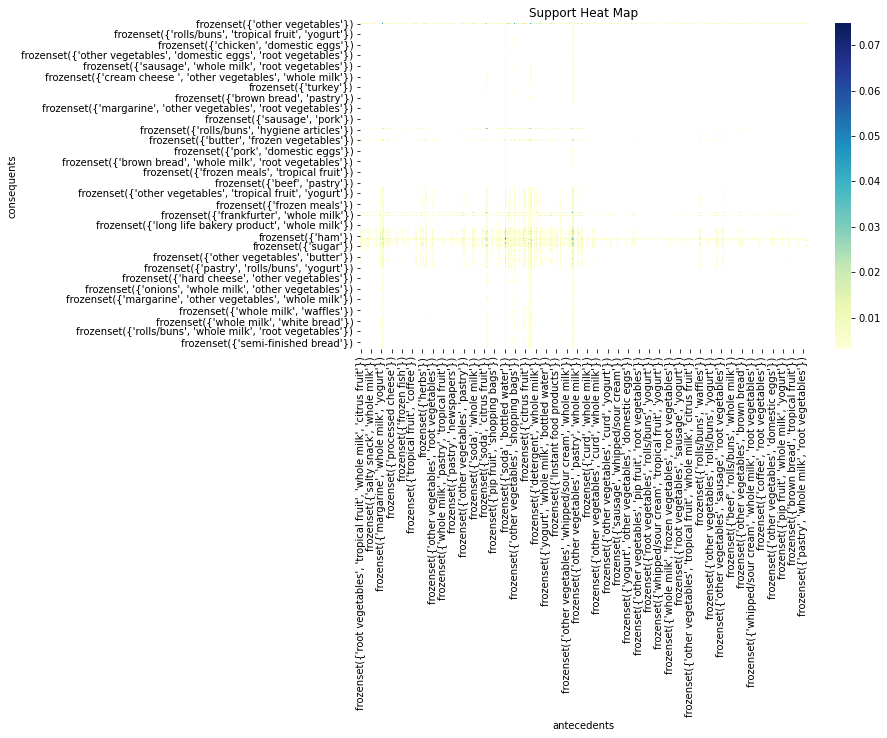

In [22]:
# Transform antecedent, consequent, and support columns into matrix
support_table = rules.pivot(index='consequents', columns='antecedents', values='support')
plt.figure(figsize=(10,6))
sns.heatmap(support_table ,cmap="YlGnBu",annot=False,cbar=True,annot_kws={"size": 5,'color':'black'})

plt.title("Support Heat Map")

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.show() 

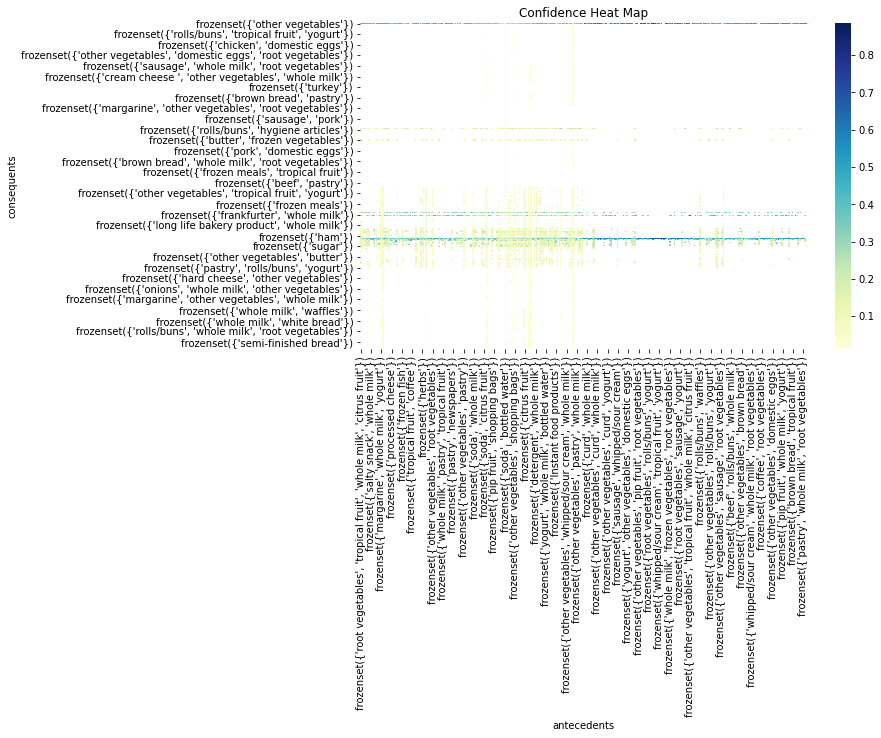

In [23]:


# Transform antecedent, consequent, and confidence columns into matrix

confidence_table=rules.pivot(index='consequents', columns='antecedents', values='confidence')
plt.figure(figsize=(10,6))
sns.heatmap(confidence_table ,cmap="YlGnBu",annot=False,cbar=True,annot_kws={"size": 5,'color':'black'})
plt.title("Confidence Heat Map")
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.show() 

**Frankfurter, Whole Milk and ham seem to have good correlation with the rest of items**

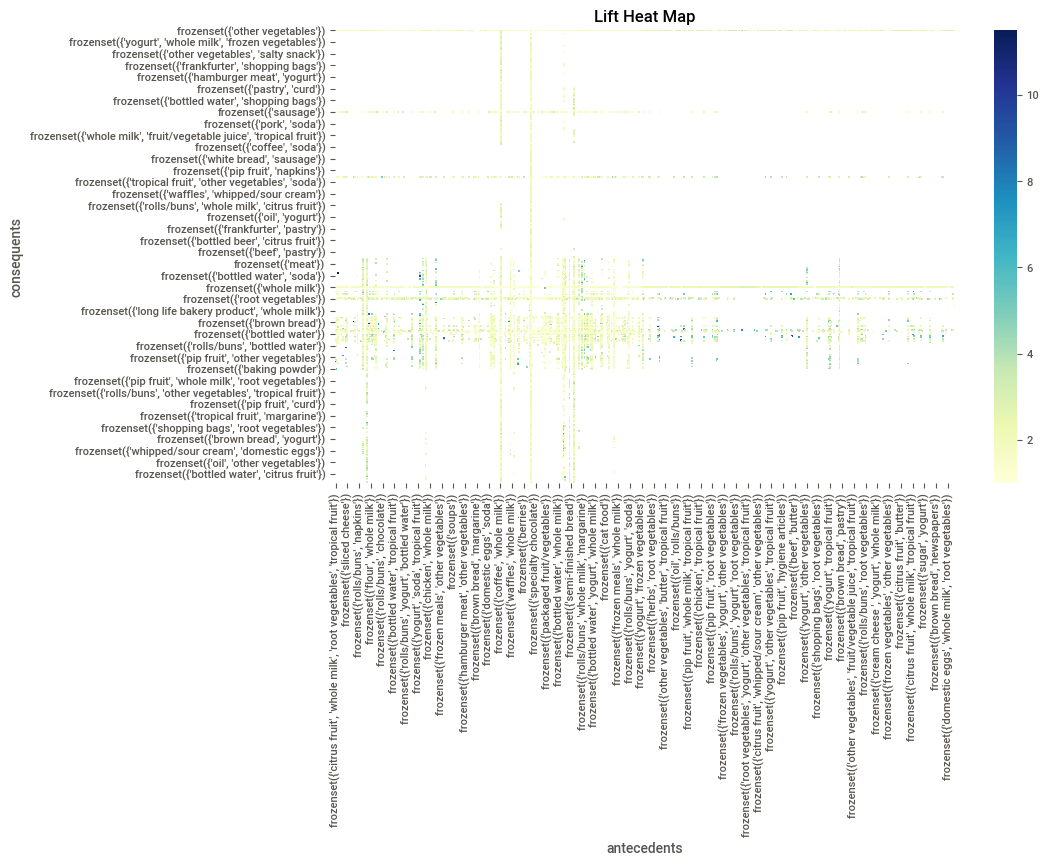

In [26]:

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'consequents', 
                    columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(10,6))
sns.heatmap(pivot,cmap="YlGnBu", annot = False, cbar = True)
plt.title("Lift Heat Map")
b, t = plt.ylim() 
b += 0.005 
t -= 0.005 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

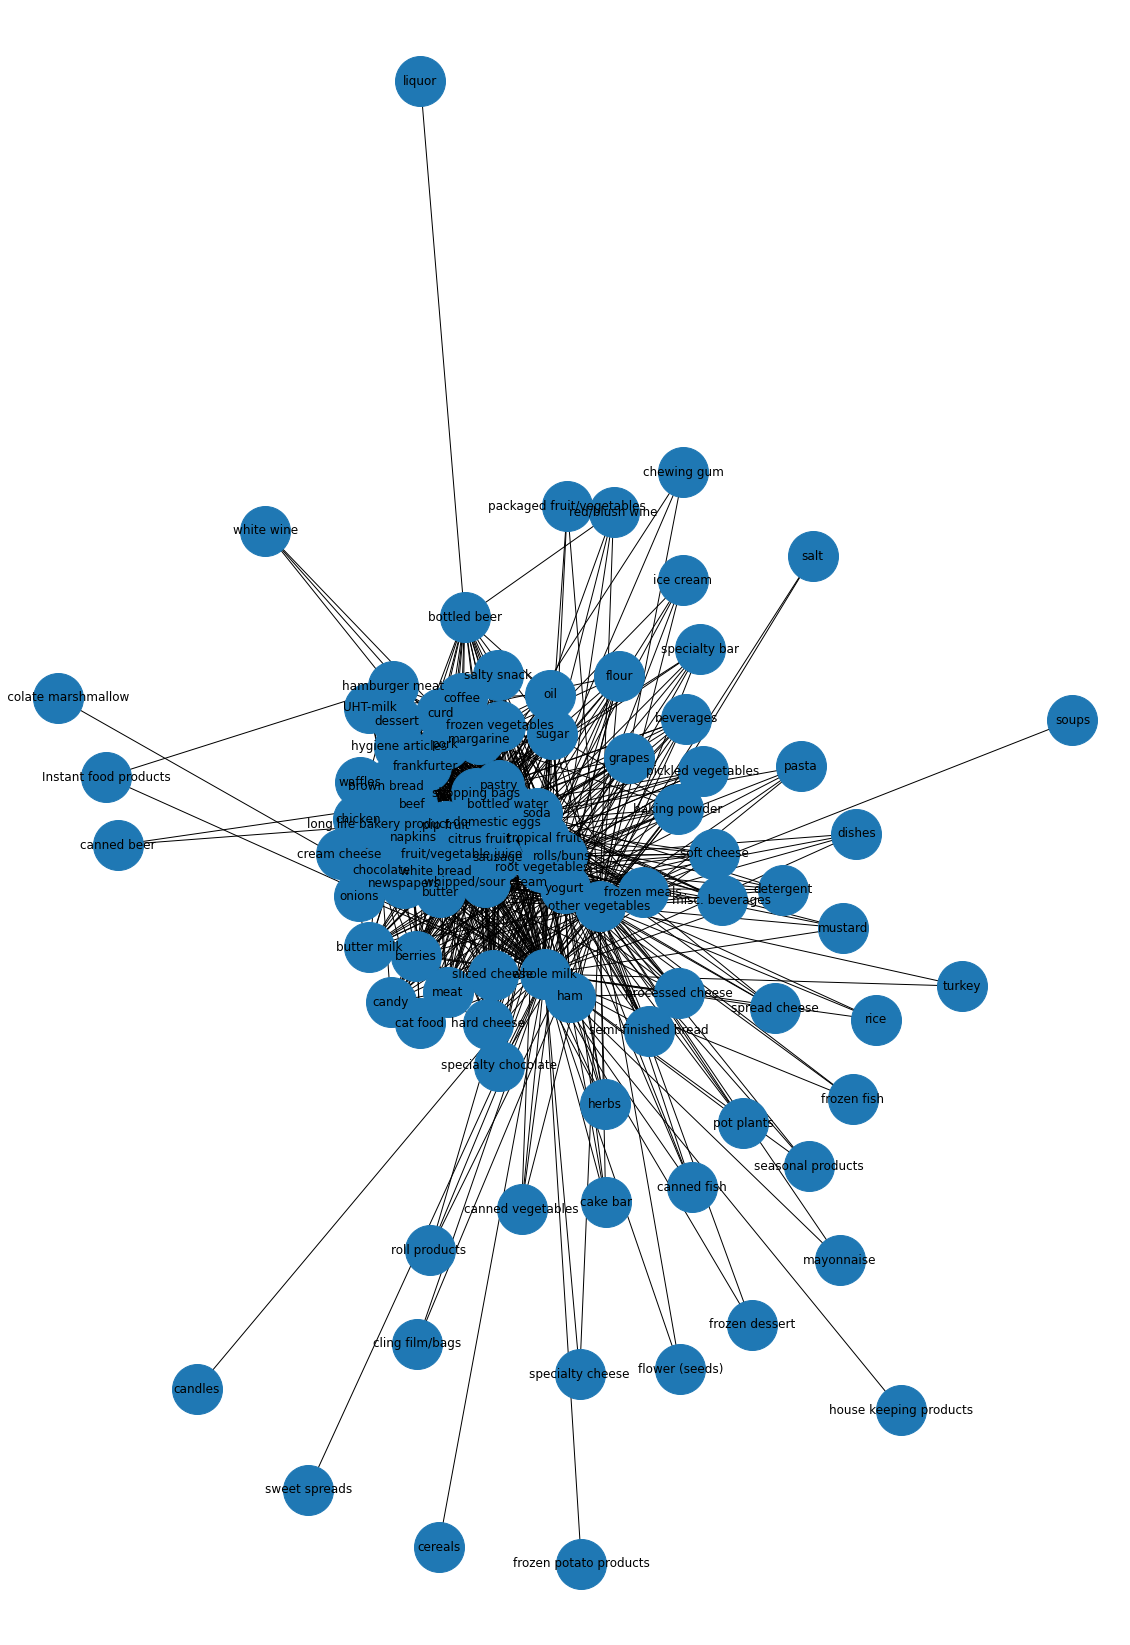

In [24]:
firstitems=rules.copy()
firstitems.antecedents  =  firstitems.antecedents.apply(lambda x: next(iter(x)))
firstitems.consequents  =  firstitems.consequents.apply(lambda x: next(iter(x)))

fig, ax = plt.subplots(figsize = [20, 30])

GA = nx.from_pandas_edgelist(firstitems, source='antecedents', target='consequents')

nx.draw(GA,with_labels=True, node_size=2500, font_color='k')

**The chart is quiet Messy at lower support Values**

**Observation:**

- Evaluate the performance of Apriori at different **Support.**

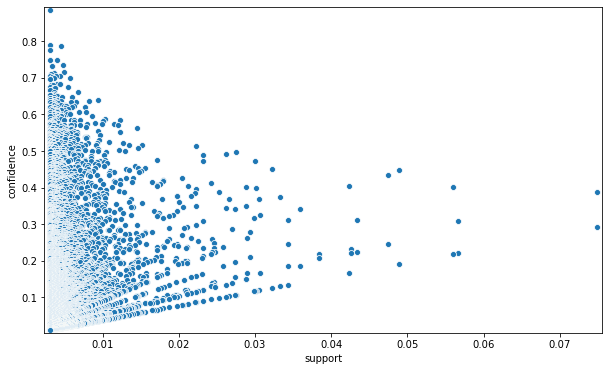

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", data = rules)
plt.margins(0.01,0.01)
plt.show();






**Observation:**

- Maximum Confidence is achieved at lower Support Values

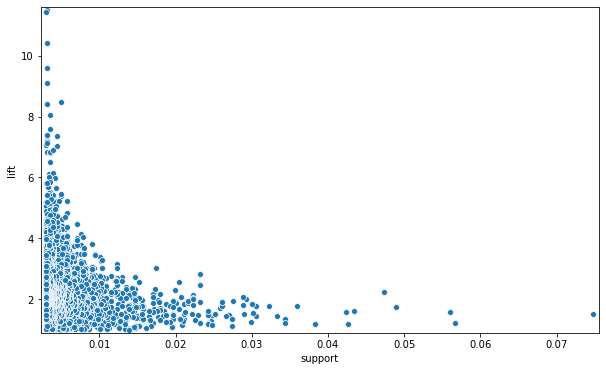

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "lift", data = rules)
plt.margins(0.01,0.01)
plt.show();


**Observation:**

- Interesting to see Maximum Lift also at lower **Support Values.**

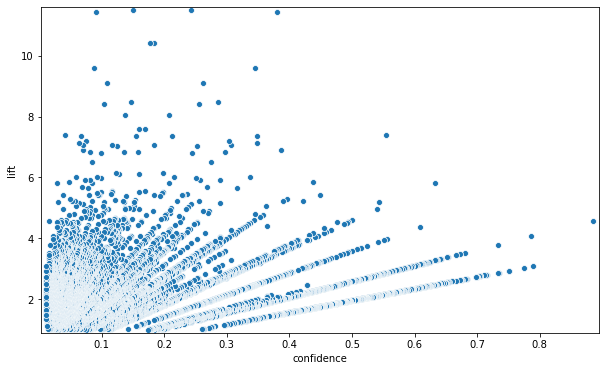

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "confidence", y = "lift", data = rules)
plt.margins(0.01,0.01)
plt.show();


**Observation:**

- Desired lift Value must be greater than 1, since our Apriori minimum Lift criterion was set at above 1, we must target higher confidence to get the maximum sale freequent item

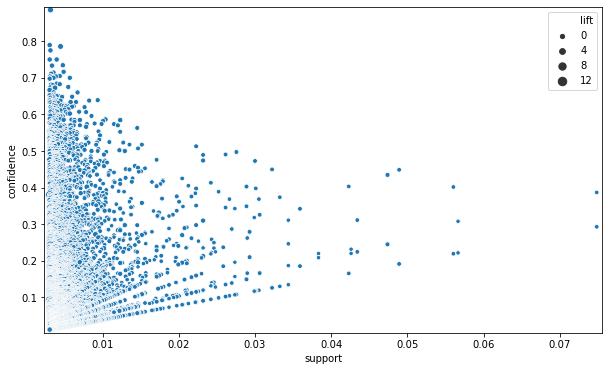

In [28]:
# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.margins(0.01,0.01)
plt.show();


    

**Observation:**

- To gain the maximum sales we must target maximum Support and maximum confidence,lift>1 ensure good association between antecedents and consequents 

Text(0.5, 1.0, 'Confidence vs lift')

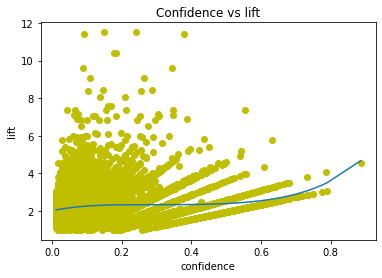

In [29]:
fit = np.polyfit(rules['confidence'], rules['lift'], 5)
fit_fn = np.poly1d(fit)
plt.plot(rules['confidence'], rules['lift'], 'yo', rules['confidence'], 
fit_fn(rules['confidence']))
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('Confidence vs lift')

**Observation:**

- Lift is showing a positive trend with increasing confidence
- As Apriori is the basic algorithm , to extract more Value out of it, need to intoduce a **NEW FEATURE WHICH ACCOUNTS FOR BOTH SUPPORT AND CONFIDENCE**
- We must Target Higher Support and Higher confidence to generate good rules, Will add a new feature **"Performance"** to get the list of Items where the **Product of support and confidence is Maximum.**

In [30]:
rules1=rules.copy(deep=True)
rules1['performance']=rules1['support']*rules1['confidence']
rules1.sort_values('performance',ascending=False,inplace=True)
rules1.head(10)

antecedents         consequents  antecedent support  \
874     (other vegetables)        (whole milk)                 0.2   
815               (yogurt)        (whole milk)                 0.1   
607      (root vegetables)        (whole milk)                 0.1   
1432          (whole milk)  (other vegetables)                 0.3   
665      (root vegetables)  (other vegetables)                 0.1   
1338          (rolls/buns)        (whole milk)                 0.2   
803       (tropical fruit)        (whole milk)                 0.1   
600   (whipped/sour cream)        (whole milk)                 0.1   
507        (domestic eggs)        (whole milk)                 0.1   
423               (butter)        (whole milk)                 0.1   

      consequent support  support  confidence  lift  leverage  conviction  \
874                  0.3      0.1         0.4   1.5       0.0         1.2   
815                  0.3      0.1         0.4   1.6       0.0         1.2   
607                  0.3      0.0         0.4   1.8       0.0         1.4   
1432                 0.2      0.1         0.3   1.5       0.0         1.1   
665                  0.2      0.0         0.4   2.2       0.0         1.4   
1338                 0.3      0.1         0.3   1.2       0.0         1.1   
803                  0.3      0.0         0.4   1.6       0.0         1.2   
600                  0.3      0.0         0.4   1.8       0.0         1.4   
507                  0.3      0.0         0.5   1.9       0.0         1.4   
423                  0.3      0.0         0.5   1.9       0.0         1.5   

      performance  
874           0.0  
815           0.0  
607           0.0  
1432          0.0  
665           0.0  
1338          0.0  
803           0.0  
600           0.0  
507           0.0  
423           0.0

In [31]:
rules1[rules1.performance>0.01]

antecedents         consequents  \
874                    (other vegetables)        (whole milk)   
815                              (yogurt)        (whole milk)   
607                     (root vegetables)        (whole milk)   
1432                         (whole milk)  (other vegetables)   
665                     (root vegetables)  (other vegetables)   
1338                         (rolls/buns)        (whole milk)   
803                      (tropical fruit)        (whole milk)   
600                  (whipped/sour cream)        (whole milk)   
507                       (domestic eggs)        (whole milk)   
423                              (butter)        (whole milk)   
1316                             (yogurt)  (other vegetables)   
453                                (curd)        (whole milk)   
2080                         (whole milk)        (rolls/buns)   
938                              (pastry)        (whole milk)   
2107                         (whole milk)            (yogurt)   
1118                     (tropical fruit)  (other vegetables)   
826                           (pip fruit)        (whole milk)   
804                  (whipped/sour cream)  (other vegetables)   
1866                   (other vegetables)   (root vegetables)   
365            (other vegetables, yogurt)        (whole milk)   
458   (other vegetables, root vegetables)        (whole milk)   
965                        (citrus fruit)        (whole milk)   
503         (whole milk, root vegetables)  (other vegetables)   
1319                      (bottled water)        (whole milk)   
1065                       (citrus fruit)  (other vegetables)   

      antecedent support  consequent support  support  confidence  lift  \
874                  0.2                 0.3      0.1         0.4   1.5   
815                  0.1                 0.3      0.1         0.4   1.6   
607                  0.1                 0.3      0.0         0.4   1.8   
1432                 0.3                 0.2      0.1         0.3   1.5   
665                  0.1                 0.2      0.0         0.4   2.2   
1338                 0.2                 0.3      0.1         0.3   1.2   
803                  0.1                 0.3      0.0         0.4   1.6   
600                  0.1                 0.3      0.0         0.4   1.8   
507                  0.1                 0.3      0.0         0.5   1.9   
423                  0.1                 0.3      0.0         0.5   1.9   
1316                 0.1                 0.2      0.0         0.3   1.6   
453                  0.1                 0.3      0.0         0.5   1.9   
2080                 0.3                 0.2      0.1         0.2   1.2   
938                  0.1                 0.3      0.0         0.4   1.5   
2107                 0.3                 0.1      0.1         0.2   1.6   
1118                 0.1                 0.2      0.0         0.3   1.8   
826                  0.1                 0.3      0.0         0.4   1.6   
804                  0.1                 0.2      0.0         0.4   2.1   
1866                 0.2                 0.1      0.0         0.2   2.2   
365                  0.0                 0.3      0.0         0.5   2.0   
458                  0.0                 0.3      0.0         0.5   1.9   
965                  0.1                 0.3      0.0         0.4   1.4   
503                  0.0                 0.2      0.0         0.5   2.4   
1319                 0.1                 0.3      0.0         0.3   1.2   
1065                 0.1                 0.2      0.0         0.3   1.8   

      leverage  conviction  performance  
874        0.0         1.2          0.0  
815        0.0         1.2          0.0  
607        0.0         1.4          0.0  
1432       0.0         1.1          0.0  
665        0.0         1.4          0.0  
1338       0.0         1.1          0.0  
803        0.0         1.2          0.0  
600        0.0         1.4          0.0  
507       

In [35]:
rules1['performance'][:30].values

array([0.02894293, 0.0224996 , 0.02194426, 0.02191739, 0.02059694,
       0.01743803, 0.01705032, 0.01449289, 0.01418029, 0.01370149,
       0.01351224, 0.01281624, 0.01255288, 0.01242548, 0.0122839 ,
       0.01227709, 0.01197391, 0.0116325 , 0.01160269, 0.01142052,
       0.01134252, 0.011242  , 0.0109888 , 0.01068635, 0.01007483,
       0.00999901, 0.0099698 , 0.00986768, 0.00981654, 0.00980186])

In [32]:
def newrule(val):
    if val>=.02:
        return 'Best Selling'
    elif ((val>=.01) and (val<.02)):
        return 'Average Selling'
    else:
        return 'Below Average Selling'

In [33]:
# Function to convert rules to coordinates.
def rules_to_coordinates(rules2):
    
    rules2=rules2.drop(['antecedent support','consequent support','support','confidence','leverage','conviction','lift'],axis=1)

    #rules=rules.sort_values('confidence',ascending=False)
    
    f= lambda x,y: list(set(x).union(set(y)))
    rules2['combined']=rules2.apply(lambda m : f(m['antecedents'],m['consequents']),axis=1)
    
    rules2=rules2.reset_index()
    rules2=rules2.rename({'index':'number'},axis=1)
    rules2.number='T'+rules2.number.astype(str)
    
    g=lambda y:y
    rules2['antecedent'] = rules2.apply(lambda o: g(o.number),axis=1)
    h=lambda y:y
    rules2['consequent'] = rules2.apply(lambda p: h(p.number),axis=1)
    
    rules2.drop(['antecedents','consequents','number'],axis=1,inplace=True)
    
    #rules2=rules2.combined.apply(pd.Series).merge(rules2, left_index = True, right_index = True).drop('combined',axis=1).melt(id_vars=['antecedent','consequent','performance'],value_name='combined').drop(['variable'],axis=1).dropna()
    rules2.combined=rules2.combined.astype(str)
    rules2['rule']=rules2.performance.apply(newrule)
    
    return rules2[['antecedent','consequent','combined','rule']]

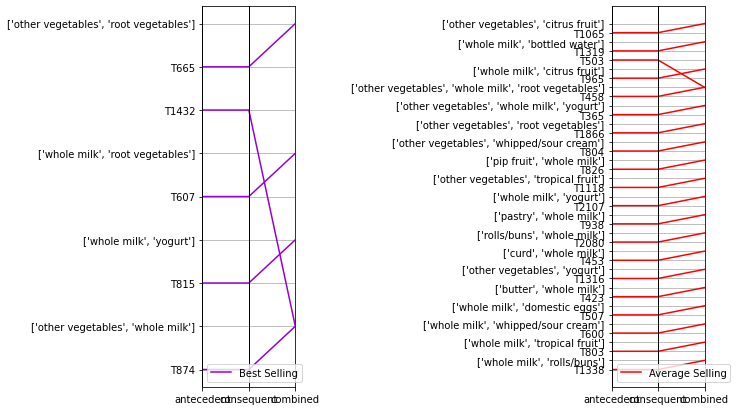

In [34]:

rules3=rules1.copy(deep=True)
coords = rules_to_coordinates(rules3)


# Generate parallel coordinates plot

fig,axes = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(9, 7))
axes=axes.flatten()
#parallel_coordinates(coords,'rule',colormap='rainbow',ax=axes[0])
parallel_coordinates(coords[coords.rule=='Best Selling'], 'rule',color='darkviolet',ax=axes[0])
parallel_coordinates(coords[coords.rule=='Average Selling'],'rule',color=('red'),ax=axes[1])
#parallel_coordinates(coords[coords.rule=='Below Average Selling'],'rule',color=('green'),ax=axes[2])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3.4, hspace=0.8) 
axes[0].legend(loc=3)
axes[1].legend(loc=3)
plt.grid(True)
plt.show()



In [35]:
coords[coords.rule=='Best Selling']['combined'].unique()

array(["['other vegetables', 'whole milk']", "['whole milk', 'yogurt']",
       "['whole milk', 'root vegetables']",
       "['other vegetables', 'root vegetables']"], dtype=object)

In [40]:
coords[coords.rule=='Average Selling']['combined'].unique()

array(["['rolls/buns', 'whole milk']", "['whole milk', 'tropical fruit']",
       "['whipped/sour cream', 'whole milk']",
       "['whole milk', 'domestic eggs']", "['whole milk', 'butter']",
       "['yogurt', 'other vegetables']", "['whole milk', 'curd']",
       "['pastry', 'whole milk']", "['yogurt', 'whole milk']",
       "['other vegetables', 'tropical fruit']",
       "['pip fruit', 'whole milk']",
       "['whipped/sour cream', 'other vegetables']",
       "['root vegetables', 'other vegetables']",
       "['yogurt', 'whole milk', 'other vegetables']",
       "['root vegetables', 'whole milk', 'other vegetables']",
       "['citrus fruit', 'whole milk']",
       "['other vegetables', 'whole milk', 'root vegetables']",
       "['bottled water', 'whole milk']",
       "['citrus fruit', 'other vegetables']"], dtype=object)

**Apriori Conclusion:**

- Whole Milk has best assciation with Other vegetables, Root Vegetables, Yogurt
- Apriori with a new Feature suggest intoduction of Flavoured Yogurt and more milk based products can be a good strategy to increase Sales 
- These associations looks quiet obvious , let us try to find whether there is more information Hidden

# **8.b) Content Based Filtering**

# **8.b.1) Cosine Based Similarity(with TF/IDF Matrix)**

In [36]:
data2 = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/groceries.csv',sep='\n',header=None)[0].str.split(',')
display(data2.shape,data2.head(),type(data2))


(9835,)

0                 [citrus fruit, semi-finished bread, margarine, ready soups]
1                                            [tropical fruit, yogurt, coffee]
2                                                                [whole milk]
3                            [pip fruit, yogurt, cream cheese , meat spreads]
4    [other vegetables, whole milk, condensed milk, long life bakery product]
Name: 0, dtype: object

pandas.core.series.Series

In [37]:
data22=data2.copy(deep=True)
data22=data22.fillna('').astype(str)

data22.head()


0                 ['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']
1                                              ['tropical fruit', 'yogurt', 'coffee']
2                                                                      ['whole milk']
3                            ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads']
4    ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product']
Name: 0, dtype: object

In [38]:
# Define a TF-IDF Vectorizer Object. Remove all english stopwords
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')



# Construct the required TF-IDF matrix on the Genre feature
tfidf_matrix = tf.fit_transform(data22)

# Output the shape of tfidf_matrix
print('Final Shape of TF-IDF Matrix:', tfidf_matrix.shape)



Final Shape of TF-IDF Matrix: (9835, 3602)


In [63]:
# no need to execute this cell, just curious what is hidden inside TF-IDF
'''doc = 9834
feature_names = tf.get_feature_names()
print(len(feature_names))
feature_index = tfidf_matrix[doc,:].nonzero()[1]
print(feature_index)
tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    print (w, s)'''

3602
[3344 3366 3350 2885   42 2884  744  707 1533 3250 3221 3220 1453]
vegetables vinegar 0.4951063858158755
vinegar shopping 0.47944610845615737
vinegar 0.32767332719113795
shopping bags 0.18053763274079207
bags 0.17514563259501822
shopping 0.18053763274079207
chicken tropical 0.3613713801061549
chicken 0.22494869840528836
fruit vegetables 0.21849477406562565
vegetables 0.1199350163902926
tropical fruit 0.1771121678461143
tropical 0.1771121678461143
fruit 0.12535794528780636


In [40]:
print(tf.idf_.shape)
indices = np.argsort(tf.idf_)[::-1]
print(indices)
features = tf.get_feature_names()
print(len(features))
top_n = 10
top_features = [features[i] for i in indices[:top_n]]
print(top_features)

(3602,)
[3601 1153 2459 ... 1453 3250 2064]
3602
['zwieback vinegar', 'drinks shopping', 'pork candy', 'pork cat', 'beer whisky', 'pork coffee', 'eggs chocolate', 'pork fruit', 'eggs chewing', 'eggs cereals']


Cosine Similarity Matrix Shape: (9835, 9835)


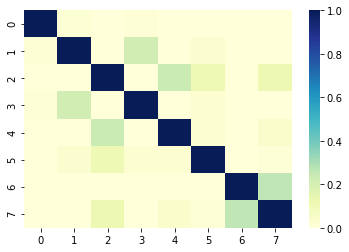

In [41]:
#Please close other unwanted windows to free memory space, if not found sufficient memory space, may give error
# Performing Cosine similarity over TF-IDF matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Printing cosine similarity matrix shape
print('Cosine Similarity Matrix Shape:', cosine_sim.shape)

# Visualizing first 8 values for similarity
sns.heatmap(data=cosine_sim[:8, :8],cmap='YlGnBu')
plt.show()

In [42]:
cosine_sim.max()

1.0000000000000018

In [43]:
indexch=['T'+str(x) for x in range(len(data2))]
data2.index=indexch



In [44]:
def genre_recommendations(title):
    
    
    '''Construct a reverse mapping of indices and movie titles, and drop duplicate titles, if any'''

    # Storing titles of movies in a list.
    #titles = data22['title']

    # Creating a series of movides and setting movies title as index.
    indices = pd.Series(list(range(len(data2))), index=data2.index)

    # Obtain the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    # And convert it into a list of tuples as described above
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores=list(filter(lambda x: x[1] <1,sim_scores))
  
  
    # Sort the movies based on the cosine similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    #print('-----',sim_scores)
  
  

    # Get the scores of the 10 most similar movies. Ignore the first movie.
    #sim_scores = sim_scores[:20]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data2.iloc[movie_indices]

In [45]:
def ghgh(ka):
    for i in ka:
        if i not in yy1:
            return(i)
    
    

In [48]:
#Enter the name of Transaction as T0,T1,T2.......
yy='T2'
#yy1=data22.loc[(data22.title==yy),'val'].values[0]
yy1=data2[yy]


rs1=genre_recommendations(yy)
display(str(yy1)+'  has following most matching combinations:')
rs2=rs1.to_frame()
#display(rs1)

rs2.columns=['val']

rs2['result'] = rs2['val'].apply(ghgh)

display(rs2.result.unique()[:15])


"['whole milk']  has following most matching combinations:"

array(['butter milk', 'other vegetables', 'tropical fruit', 'yogurt',
       'frankfurter', 'condensed milk', 'butter', 'dessert',
       'root vegetables', 'curd', 'UHT-milk', 'pork', 'pastry',
       'rolls/buns', 'soda'], dtype=object)

- **Based on 'T2' Transaction alone which has whole milk only 'Butter mIlk, Other Vegetables, Tropical Fruit, Yogurt.....all milk beased products , vegetables and tropical fruit have best associations.**

In [49]:
rs2.result[:20].unique()

array(['butter milk', 'other vegetables', 'tropical fruit', 'yogurt',
       'frankfurter', 'condensed milk'], dtype=object)

**Let us Find out Which Transactions are best correlated to each other based on TF-IDF Cosine Based Similarity Score**

In [50]:
# For replacing instances with the 0 value where the Cossimilarity score with itself is 1
cosine_sim[cosine_sim>=0.99]=0

In [51]:
cosine_sim.max()

0.9702508299888994

In [52]:
%%time
cosine_sim_1d = cosine_sim.flatten()
idx_1d = cosine_sim_1d.argsort()[-100:]
x_idx, y_idx = np.unravel_index(idx_1d, cosine_sim.shape)
transac=list()
for xc, yc, in zip(x_idx, y_idx):
    zc=cosine_sim[xc,yc]
    transac.append((xc,yc,zc))

Wall time: 14.6 s


In [92]:
transac1=[]
for i in range(0,len(transac),1):
    
    ko='T'+str(transac[i][0])
    ka='T'+str(transac[i][1])
    ke=transac[i][2]
    transac1.append((ko,ka,ke))
#print(transac1)
seen=set()
a = [seen.add((x,y,z)) for x,y,z in transac1 if (x,y,z) and (y,x,z) not in seen ]
transac1=list(seen)
whoa=pd.DataFrame()
for i in range(len(transac1)):
    whoa=whoa.append(pd.DataFrame({'Ante':transac1[i][0],'Conse':transac1[i][1],'Cos':transac1[i][2]},index=[0]),ignore_index=True)
whoa=whoa.sort_values(by='Cos',axis=0,ascending=False).reset_index(drop=True)
whoa['items1']=whoa['Ante'].apply(lambda x:data2[x])
whoa['items2']=whoa['Conse'].apply(lambda x:data2[x])
f= lambda x,y: list(set(x).union(set(y)))
whoa['combined']=whoa.apply(lambda m : f(m['items1'],m['items2']),axis=1)
display(whoa.head(10))





    
    
    

Ante  Conse  Cos  \
0  T8639  T8585  0.9   
1  T4765  T5021  0.9   
2  T2328  T2521  0.9   
3  T6270  T1670  0.9   
4  T9428  T2348  0.9   
5  T2507  T4530  0.9   
6   T225   T752  0.9   
7    T40   T752  0.9   
8  T7242   T730  0.9   
9  T6360   T680  0.9   

                                                                                   items1  \
0                     [beef, citrus fruit, whole milk, yogurt, rolls/buns, bottled water]   
1                                   [soda, bottled beer, liquor, red/blush wine, napkins]   
2                            [whole milk, beverages, bottled water, cake bar, newspapers]   
3                                [whole milk, yogurt, mustard, bottled water, newspapers]   
4          [pip fruit, root vegetables, other vegetables, whole milk, yogurt, rolls/buns]   
5  [chicken, citrus fruit, tropical fruit, root vegetables, other vegetables, whole milk]   
6                  [sausage, sliced cheese, rolls/buns, soda, canned beer, shopping bags]   
7                  [sausage, rolls/buns, soda, canned beer, specialty bar, shopping bags]   
8                                [yogurt, bottled beer, white wine, salty snack, napkins]   
9                              [other vegetables, butter milk, cream cheese , rolls/buns]   

                                                                          items2  \
0                  [citrus fruit, whole milk, yogurt, rolls/buns, bottled water]   
1        [processed cheese, soda, bottled beer, liquor, red/blush wine, napkins]   
2             [whole milk, beverages, bottled water, soda, cake bar, newspapers]   
3            [whole milk, yogurt, beverages, mustard, bottled water, newspapers]   
4             [pip fruit, root vegetables, other vegetables, whole milk, yogurt]   
5  [citrus fruit, tropical fruit, root vegetables, other vegetables, whole milk]   
6                        [sausage, rolls/buns, soda, canned beer, shopping bags]   
7                        [sausage, rolls/buns, soda, canned beer, shopping bags]   
8           [whole milk, yogurt, bottled beer, white wine, salty snack, napkins]   
9          [pip fruit, other vegetables, butter milk, cream cheese , rolls/buns]   

                                                                                 combined  
0                     [beef, whole milk, rolls/buns, citrus fruit, bottled water, yogurt]  
1                 [bottled beer, processed cheese, soda, liquor, red/blush wine, napkins]  
2                      [whole milk, newspapers, beverages, bottled water, soda, cake bar]  
3                     [whole milk, newspapers, mustard, beverages, bottled water, yogurt]  
4          [whole milk, rolls/buns, root vegetables, pip fruit, yogurt, other vegetables]  
5  [whole milk, citrus fruit, root vegetables, chicken, other vegetables, tropical fruit]  
6                  [shopping bags, rolls/buns, canned beer, sausage, soda, sliced cheese]  
7                  [shopping bags, rolls/buns, specialty bar, canned beer, sausage, soda]  
8                    [whole milk, bottled beer, salty snack, yogurt, white wine, napkins]  
9                   [rolls/buns, butter milk, cream cheese , pip fruit, other vegetables]

Ante  Conse  Cos                                                items1  \
208  T8507  T1764  0.9                     [sausage, whole milk, rolls/buns]   
209  T5097  T3600  0.9                     [pork, whole milk, shopping bags]   
210  T5913  T2616  0.9                         [sausage, yogurt, rolls/buns]   
211  T5505  T2719  0.9  [rolls/buns, margarine, bottled water, bottled beer]   
212  T2286  T7310  0.9      [bottled water, soda, bottled beer, dental care]   
213  T4813  T3696  0.9          [soda, bottled beer, liquor, red/blush wine]   
214  T3703  T2966  0.9                 [pork, UHT-milk, bottled water, soda]   
215  T7997  T1783  0.9             [tropical fruit, pastry, soda, chocolate]   
216  T3988  T5467  0.9       [whole milk, rolls/buns, spices, bottled water]   
217  T4370  T2327  0.9                       [rolls/buns, brown bread, soda]   

                                             items2  \
208  [sausage, whole milk, rolls/buns, canned beer]   
209       [pork, whole milk, pastry, shopping bags]   
210             [sausage, yogurt, rolls/buns, soda]   
211       [rolls/buns, bottled water, bottled beer]   
212             [bottled water, soda, bottled beer]   
213          [bottled beer, liquor, red/blush wine]   
214                 [UHT-milk, bottled water, soda]   
215                  [tropical fruit, pastry, soda]   
216         [whole milk, rolls/buns, bottled water]   
217  [spread cheese, rolls/buns, brown bread, soda]   

                                                 combined  
208        [rolls/buns, whole milk, canned beer, sausage]  
209             [shopping bags, whole milk, pork, pastry]  
210                   [soda, rolls/buns, yogurt, sausage]  
211  [rolls/buns, bottled beer, margarine, bottled water]  
212      [soda, bottled beer, dental care, bottled water]  
213          [soda, liquor, bottled beer, red/blush wine]  
214                 [soda, pork, UHT-milk, bottled water]  
215             [soda, chocolate, pastry, tropical fruit]  
216       [rolls/buns, whole milk, spices, bottled water]  
217        [soda, rolls/buns, spread cheese, brown bread]

In [54]:
def l(b):
    if b>=0.95:
        return 'Cosine_Sim>=0.95'
    elif ((b>=0.94)and(b<0.95)):
        return 'Cosine_Sim>=0.94 but < 0.95'
    elif ((b>=0.93)and(b<0.94)):
        return 'Cosine_Sim>=0.93 but < 0.94'
    else:
        return 'Cosine_Sim>=0.91 but < 0.93'
    

In [55]:
wh=whoa.copy(deep=True)
wh.drop(['items1','items2'],axis=1,inplace=True)
w=wh.combined.apply(pd.Series).merge(wh, left_index = True, right_index = True).drop(["combined"], axis = 1).melt(id_vars=['Ante','Conse','Cos'],value_name='combined').drop(['variable'],axis=1).dropna()
rules4=w.sort_values('Cos', ascending  =  False)
rules4['label']=rules4['Cos'].apply(l)

rules4.head()

Ante Conse  Cos      combined             label
0    T7242  T730  1.0    whole milk  Cosine_Sim>=0.95
50   T7242  T730  1.0  bottled beer  Cosine_Sim>=0.95
200  T7242  T730  1.0    white wine  Cosine_Sim>=0.95
150  T7242  T730  1.0        yogurt  Cosine_Sim>=0.95
100  T7242  T730  1.0   salty snack  Cosine_Sim>=0.95

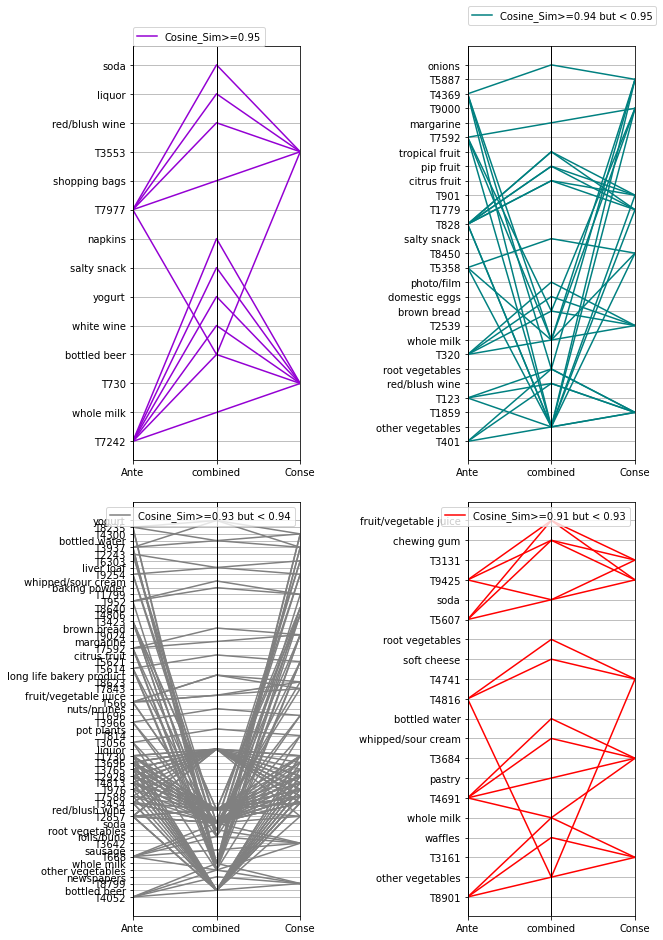

In [56]:
fig,axes = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(9, 16))
axes=axes.flatten()
coords1=rules4[['Ante','combined','Conse','label']]
#parallel_coordinates(coords1, 'label',colormap='rainbow',ax=axes[0])
parallel_coordinates(coords1[coords1.label=='Cosine_Sim>=0.95'],'label',color=('darkviolet'),ax=axes[0])
parallel_coordinates(coords1[coords1.label=='Cosine_Sim>=0.94 but < 0.95'],'label',color=('teal'),ax=axes[1])
parallel_coordinates(coords1[coords1.label=='Cosine_Sim>=0.93 but < 0.94'],'label',color='grey',ax=axes[2])
parallel_coordinates(coords1[coords1.label=='Cosine_Sim>=0.91 but < 0.93'],'label',color='red',ax=axes[3])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.0, hspace=0.1) 

plt.grid(True)
axes[0].legend(loc=(0,1))
axes[1].legend(loc=(0,1.05))

plt.show()

In [57]:
coords1[coords1.label=='Cosine_Sim>=0.95']['combined'].unique()

array(['whole milk', 'bottled beer', 'white wine', 'yogurt',
       'salty snack', 'napkins', 'shopping bags', 'red/blush wine',
       'liquor', 'soda'], dtype=object)

**ContentBased Filtering(Based on TF-IDF Vectors) Conclusion:(Best Selling Items)**

- Whole Milk has best cossimilarity with Butter Milk,Other vegetables, Tropical Fruit,Yogurt
  (**Based on TF-IDF MATRIX COSSIMILARITY of only Whole Milk transaction**)

- Whole Milk has best cossimilarity with Yogurt,Bottled BEER, SALTY SNACK, NAPKINS, WHITEWINE
  (**Based on Overall Cossimilarity of all transactions**)
 
- **Interesting to see the Whole Milk and Yogurt Bought along with Bottled Beer, WHITEWINE and Napkins**

**Below items Can be considered for Discount offers and Positining around the Best Selling Items**

In [58]:
coords1[coords1.label=='Cosine_Sim>=0.94 but < 0.95']['combined'].unique()

array(['other vegetables', 'red/blush wine', 'root vegetables',
       'whole milk', 'brown bread', 'domestic eggs', 'photo/film',
       'salty snack', 'citrus fruit', 'pip fruit', 'tropical fruit',
       'margarine', 'onions'], dtype=object)

In [59]:
coords1[coords1.label=='Cosine_Sim>=0.93 but < 0.94']['combined'].unique()

array(['bottled beer', 'newspapers', 'other vegetables', 'whole milk',
       'sausage', 'rolls/buns', 'root vegetables', 'soda',
       'red/blush wine', 'liquor', 'pot plants', 'nuts/prunes',
       'fruit/vegetable juice', 'long life bakery product',
       'citrus fruit', 'margarine', 'brown bread', 'baking powder',
       'whipped/sour cream', 'liver loaf', 'bottled water', 'yogurt'],
      dtype=object)

In [60]:
coords1[coords1.label=='Cosine_Sim>=0.91 but < 0.93']['combined'].unique()

array(['other vegetables', 'waffles', 'whole milk', 'pastry',
       'whipped/sour cream', 'bottled water', 'soft cheese',
       'root vegetables', 'soda', 'chewing gum', 'fruit/vegetable juice'],
      dtype=object)

# **8.b.2) Cosine Based Similarity(without TF/IDF Matrix)**

In [61]:
data3 = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/groceries.csv',sep='\n',header=None)[0].str.split(',')
display(data3.shape,data3.head(),type(data3))


(9835,)

0                 [citrus fruit, semi-finished bread, margarine, ready soups]
1                                            [tropical fruit, yogurt, coffee]
2                                                                [whole milk]
3                            [pip fruit, yogurt, cream cheese , meat spreads]
4    [other vegetables, whole milk, condensed milk, long life bakery product]
Name: 0, dtype: object

pandas.core.series.Series

In [62]:
encoded_data.head(2)

Item         Instant food products  UHT-milk  abrasive cleaner  \
Transaction                                                      
0                                0         0                 0   
1                                0         0                 0   

Item         artif. sweetener  baby cosmetics  baby food  bags  baking powder  \
Transaction                                                                     
0                           0               0          0     0              0   
1                           0               0          0     0              0   

Item         bathroom cleaner  beef  berries  beverages  bottled beer  \
Transaction                                                             
0                           0     0        0          0             0   
1                           0     0        0          0             0   

Item         bottled water  brandy  brown bread  butter  butter milk  \
Transaction                                                            
0                        0       0            0       0            0   
1                        0       0            0       0            0   

Item         cake bar  candles  candy  canned beer  canned fish  canned fruit  \
Transaction                                                                     
0                   0        0      0            0            0             0   
1                   0        0      0            0            0             0   

Item         canned vegetables  cat food  cereals  chewing gum  chicken  \
Transaction                                                               
0                            0         0        0            0        0   
1                            0         0        0            0        0   

Item         chocolate  chocolate marshmallow  citrus fruit  cleaner  \
Transaction                                                            
0                    0                      0             1        0   
1                    0                      0             0        0   

Item         cling film/bags  cocoa drinks  coffee  condensed milk  \
Transaction                                                          
0                          0             0       0               0   
1                          0             0       1               0   

Item         cooking chocolate  cookware  cream  cream cheese   curd  \
Transaction                                                            
0                            0         0      0              0     0   
1                            0         0      0              0     0   

Item         curd cheese  decalcifier  dental care  dessert  detergent  \
Transaction                                                              
0                      0            0            0        0          0   
1                      0            0            0        0          0   

Item         dish cleaner  dishes  dog food  domestic eggs  \
Transaction                                                  
0                       0       0         0              0   
1                       0       0         0              0   

Item         female sanitary products  finished products  fish  flour  \
Transaction                                                             
0                                   0                  0     0      0   
1                                   0                  0     0      0   

Item         flower (seeds)  flower soil/fertilizer  frankfurter  \
Transaction                                                        
0                         0                       0            0   
1                         0                       0            0   

Item         frozen chicken  frozen dessert  frozen fish  frozen fruits  \
Transaction                                                               
0                         0               0            0              0   
1     

Cosine Similarity Matrix Shape: (9835, 9835)


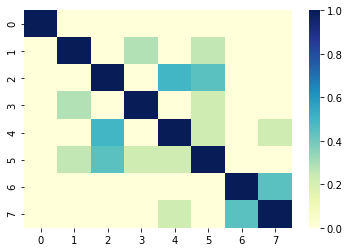

In [63]:
# Performing Cosine similarity over TF-IDF matrix
cosine_sim1 =cosine_similarity(encoded_data,encoded_data)

# Printing cosine similarity matrix shape
print('Cosine Similarity Matrix Shape:', cosine_sim1.shape)

# Visualizing first 8 values for similarity
sns.heatmap(data=cosine_sim1[:8, :8],cmap='YlGnBu')
plt.show()

In [64]:
indexch=['T'+str(x) for x in range(len(data3))]
data3.index=indexch
data3.head(2)

T0    [citrus fruit, semi-finished bread, margarine, ready soups]
T1                               [tropical fruit, yogurt, coffee]
Name: 0, dtype: object

In [65]:
cosine_sim1.max()

1.0000000000000004

In [66]:
def genre_recommendations(title):
    
    
    '''Construct a reverse mapping of indices and movie titles, and drop duplicate titles, if any'''

    # Storing titles of movies in a list.
    #titles = data22['title']

    # Creating a series of movides and setting movies title as index.
    indices = pd.Series(list(range(len(data3))), index=data3.index)

    # Obtain the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    # And convert it into a list of tuples as described above
    sim_scores = list(enumerate(cosine_sim1[idx]))
    sim_scores=list(filter(lambda x: x[1] <1,sim_scores))
  
  
    # Sort the movies based on the cosine similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    #print('-----',sim_scores)
  
  

    # Get the scores of the 10 most similar movies. Ignore the first movie.
    #sim_scores = sim_scores[:20]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data3.iloc[movie_indices]

In [67]:
yy='T2'
#yy1=data22.loc[(data22.title==yy),'val'].values[0]
yy1=data3[yy]


rs1=genre_recommendations(yy)
display(str(yy1)+'  has following most matching combinations:')
rs2=rs1.to_frame()
#display(rs1)

rs2.columns=['val']

rs2['result'] = rs2['val'].apply(ghgh)

display(rs2.result.unique()[:10])


"['whole milk']  has following most matching combinations:"

array(['cereals', 'frozen vegetables', 'salt', 'beverages',
       'tropical fruit', 'soda', 'hygiene articles', 'curd',
       'red/blush wine', 'dessert'], dtype=object)

- **Based on 'T2' Transaction alone which has whole milk only 'Cereals, Frozen Vegetables, Beverages, Tropical fruit.... have best associations.**

 **Let us find out Best Items based on all transactions for the whole dataset based on Cosine Similarity without TF/IDF score.** 

In [68]:
cosine_sim1[cosine_sim1>=0.99]=0

In [69]:
cosine_sim1.shape

(9835, 9835)

In [70]:
cosine_sim1.max()

0.912870929175277

In [71]:
%%time
cosine_sim_1d = cosine_sim1.flatten()
idx_1d = cosine_sim_1d.argsort()[-300:]
x_idx, y_idx = np.unravel_index(idx_1d, cosine_sim1.shape)
transac=list()
for xc, yc, in zip(x_idx, y_idx):
    zc=cosine_sim1[xc,yc]
    #print(xc,yc,zc)
    transac.append((xc,yc,zc))

Wall time: 8.69 s


In [72]:
transac1=[]
for i in range(0,len(transac),1):
    
    ko='T'+str(transac[i][0])
    ka='T'+str(transac[i][1])
    ke=transac[i][2]
    transac1.append((ko,ka,ke))
#print(transac1)
seen=set()
a = [seen.add((x,y,z)) for x,y,z in transac1 if (x,y,z) and (y,x,z) not in seen ]
transac1=list(seen)
whoa=pd.DataFrame()
for i in range(len(transac1)):
    whoa=whoa.append(pd.DataFrame({'Ante':transac1[i][0],'Conse':transac1[i][1],'Cos':transac1[i][2]},index=[0]),ignore_index=True)
whoa=whoa.sort_values(by='Cos',axis=0,ascending=False).reset_index(drop=True)
whoa['items1']=whoa['Ante'].apply(lambda x:data3[x])
whoa['items2']=whoa['Conse'].apply(lambda x:data3[x])
f= lambda x,y: list(set(x).union(set(y)))
whoa['combined']=whoa.apply(lambda m : f(m['items1'],m['items2']),axis=1)
whoa.head(10)




    
    
    

Ante  Conse  Cos  \
0  T8639  T8585  0.9   
1  T4765  T5021  0.9   
2  T2328  T2521  0.9   
3  T6270  T1670  0.9   
4  T9428  T2348  0.9   
5  T2507  T4530  0.9   
6   T225   T752  0.9   
7    T40   T752  0.9   
8  T7242   T730  0.9   
9  T6360   T680  0.9   

                                                                                   items1  \
0                     [beef, citrus fruit, whole milk, yogurt, rolls/buns, bottled water]   
1                                   [soda, bottled beer, liquor, red/blush wine, napkins]   
2                            [whole milk, beverages, bottled water, cake bar, newspapers]   
3                                [whole milk, yogurt, mustard, bottled water, newspapers]   
4          [pip fruit, root vegetables, other vegetables, whole milk, yogurt, rolls/buns]   
5  [chicken, citrus fruit, tropical fruit, root vegetables, other vegetables, whole milk]   
6                  [sausage, sliced cheese, rolls/buns, soda, canned beer, shopping bags]   
7                  [sausage, rolls/buns, soda, canned beer, specialty bar, shopping bags]   
8                                [yogurt, bottled beer, white wine, salty snack, napkins]   
9                              [other vegetables, butter milk, cream cheese , rolls/buns]   

                                                                          items2  \
0                  [citrus fruit, whole milk, yogurt, rolls/buns, bottled water]   
1        [processed cheese, soda, bottled beer, liquor, red/blush wine, napkins]   
2             [whole milk, beverages, bottled water, soda, cake bar, newspapers]   
3            [whole milk, yogurt, beverages, mustard, bottled water, newspapers]   
4             [pip fruit, root vegetables, other vegetables, whole milk, yogurt]   
5  [citrus fruit, tropical fruit, root vegetables, other vegetables, whole milk]   
6                        [sausage, rolls/buns, soda, canned beer, shopping bags]   
7                        [sausage, rolls/buns, soda, canned beer, shopping bags]   
8           [whole milk, yogurt, bottled beer, white wine, salty snack, napkins]   
9          [pip fruit, other vegetables, butter milk, cream cheese , rolls/buns]   

                                                                                 combined  
0                     [beef, whole milk, rolls/buns, citrus fruit, bottled water, yogurt]  
1                 [bottled beer, processed cheese, soda, liquor, red/blush wine, napkins]  
2                      [whole milk, newspapers, beverages, bottled water, soda, cake bar]  
3                     [whole milk, newspapers, mustard, beverages, bottled water, yogurt]  
4          [whole milk, rolls/buns, root vegetables, pip fruit, yogurt, other vegetables]  
5  [whole milk, citrus fruit, root vegetables, chicken, other vegetables, tropical fruit]  
6                  [shopping bags, rolls/buns, canned beer, sausage, soda, sliced cheese]  
7                  [shopping bags, rolls/buns, specialty bar, canned beer, sausage, soda]  
8                    [whole milk, bottled beer, salty snack, yogurt, white wine, napkins]  
9                   [rolls/buns, butter milk, cream cheese , pip fruit, other vegetables]

In [73]:
whoa[:10].Cos.values

array([0.91287093, 0.91287093, 0.91287093, 0.91287093, 0.91287093,
       0.91287093, 0.91287093, 0.91287093, 0.91287093, 0.89442719])

In [74]:
def l(b):
    if b>=0.90:
        return 'Cosine_Sim>=0.90'
    elif ((b>=0.88)and(b<0.90)):
        return 'Cosine_Sim>=0.88 but < 0.90'
    elif ((b>=0.87)and(b<0.88)):
        return 'Cosine_Sim>=0.87 but < 0.88'
    else:
        return 'Cosine_Sim>=0.866 but < 0.87'
    

In [75]:
wh=whoa.copy(deep=True)
wh.drop(['items1','items2'],axis=1,inplace=True)
w=wh.combined.apply(pd.Series).merge(wh, left_index = True, right_index = True).drop(["combined"], axis = 1).melt(id_vars=['Ante','Conse','Cos'],value_name='combined').drop(['variable'],axis=1).dropna()
rules5=w.sort_values('Cos', ascending  =  False)
rules5['label']=rules5['Cos'].apply(l)

rules5.head()

Ante  Conse  Cos          combined             label
0     T8639  T8585  0.9              beef  Cosine_Sim>=0.90
1091  T4765  T5021  0.9           napkins  Cosine_Sim>=0.90
219   T4765  T5021  0.9  processed cheese  Cosine_Sim>=0.90
220   T2328  T2521  0.9        newspapers  Cosine_Sim>=0.90
438   T2328  T2521  0.9         beverages  Cosine_Sim>=0.90

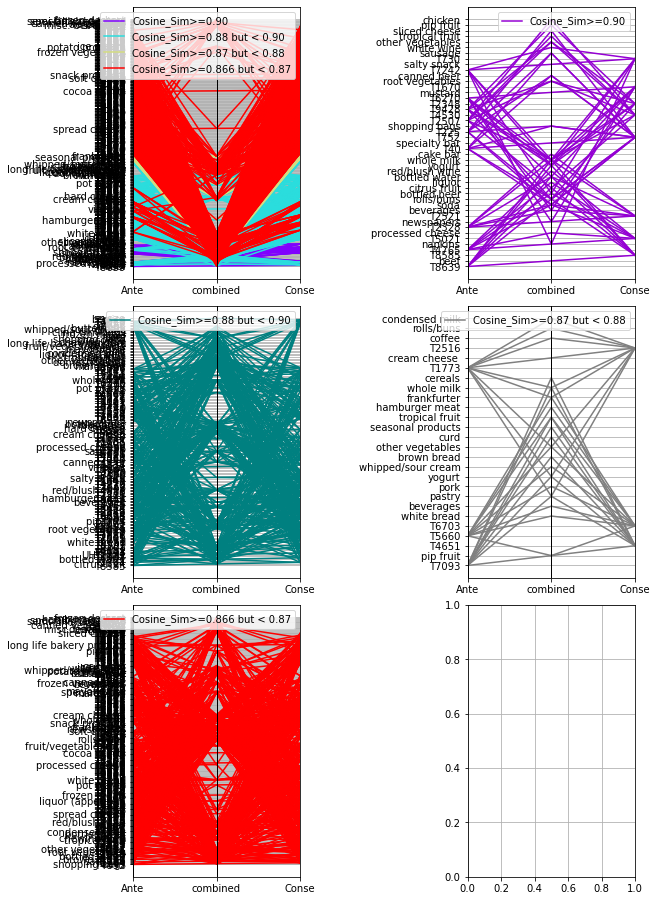

In [76]:
fig,axes = plt.subplots(nrows=3, ncols=2, sharex=False, figsize=(9, 16))
axes=axes.flatten()
coords3=rules5[['Ante','combined','Conse','label']]
parallel_coordinates(coords3, 'label',colormap='rainbow',ax=axes[0])
parallel_coordinates(coords3[coords3.label=='Cosine_Sim>=0.90'],'label',color=('darkviolet'),ax=axes[1])
parallel_coordinates(coords3[coords3.label=='Cosine_Sim>=0.88 but < 0.90'],'label',color=('teal'),ax=axes[2])
parallel_coordinates(coords3[coords3.label=='Cosine_Sim>=0.87 but < 0.88'],'label',color='grey',ax=axes[3])
parallel_coordinates(coords3[coords3.label=='Cosine_Sim>=0.866 but < 0.87'],'label',color='red',ax=axes[4])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.0, hspace=0.1) 

plt.grid(True)
plt.show()

**ContentBased Filtering(without TF-IDF Vectors) Conclusion**

- Whole Milk has best cossimilarity with cereals,frozen vegetables,salt,beverages,tropical fruit, soda,hygiene articles    curd,red/blush wine,dessert
      (Based on COSSIMILARITY of only Whole Milk transaction)

- Whole Milk has best cossimilarity with Beef,Napkins,Processed Cheese,Newspaper,Beverages,Bottled Beer, cake Bar......
  (Based on Overall Cossimilarity of all transactions)

In [78]:
coords3[coords3.label=='Cosine_Sim>=0.90']['combined'].unique()

array(['beef', 'napkins', 'processed cheese', 'newspapers', 'beverages',
       'soda', 'rolls/buns', 'bottled beer', 'citrus fruit', 'liquor',
       'bottled water', 'red/blush wine', 'yogurt', 'whole milk',
       'cake bar', 'specialty bar', 'shopping bags', 'mustard',
       'root vegetables', 'canned beer', 'salty snack', 'sausage',
       'white wine', 'other vegetables', 'tropical fruit',
       'sliced cheese', 'pip fruit', 'chicken'], dtype=object)

In [79]:
coords3[coords3.label=='Cosine_Sim>=0.88 but < 0.90']['combined'].unique()

array(['citrus fruit', 'bottled water', 'UHT-milk', 'pastry', 'soda',
       'white bread', 'root vegetables', 'yogurt', 'pip fruit', 'liquor',
       'beverages', 'hamburger meat', 'red/blush wine', 'salty snack',
       'vinegar', 'canned beer', 'sausage', 'processed cheese', 'butter',
       'cream cheese ', 'pork', 'hard cheese', 'chicken', 'rolls/buns',
       'bottled beer', 'newspapers', 'coffee', 'pot plants', 'whole milk',
       'flour', 'margarine', 'brown bread', 'sugar', 'domestic eggs',
       'other vegetables', 'waffles', 'tropical fruit', 'napkins',
       'liquor (appetizer)', 'condensed milk', 'curd', 'mayonnaise',
       'cake bar', 'fruit/vegetable juice', 'dessert',
       'long life bakery product', 'chewing gum', 'chocolate',
       'shopping bags', 'beef', 'jam', 'frozen meals', 'cling film/bags',
       'dishes', 'whipped/sour cream', 'butter milk', 'onions', 'berries'],
      dtype=object)

## **8.c) Collaborative Based Filtering (Model Based Approach)**

## **8.c.1)Singular Value Decomposition**

In [80]:
%%time
from scipy.sparse.linalg import svds
U,Sigma,Vt=svds(tfidf_matrix,k=80)

Wall time: 302 ms


In [81]:
U.shape

(9835, 80)

In [82]:
Vt.shape

(80, 3602)

In [83]:
Sigma=np.diag(Sigma)

In [84]:
Sigma

array([[ 4.57163425,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  4.5788089 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  4.64305512, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 15.92225985,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        18.61827609,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 21.4556242 ]])

In [85]:
all_products_predicted_ratings=np.dot(np.dot(U,Sigma),Vt)

In [86]:
all_products_predicted_ratings.shape

(9835, 3602)

In [87]:
preds=pd.DataFrame(all_products_predicted_ratings,columns=features)
preds.head()

abrasive  abrasive cleaner  alcohol  alcohol cling  alcohol hygiene  \
0       0.0               0.0      0.0           -0.0              0.0   
1       0.0               0.0      0.0            0.0              0.0   
2      -0.0              -0.0      0.0            0.0             -0.0   
3      -0.0              -0.0      0.0            0.0             -0.0   
4       0.0               0.0      0.0            0.0              0.0   

   appetizer  appetizer bathroom  appetizer cake  appetizer candy  \
0       -0.0                -0.0             0.0             -0.0   
1        0.0                 0.0            -0.0              0.0   
2        0.0                -0.0             0.0             -0.0   
3       -0.0                -0.0            -0.0             -0.0   
4       -0.0                -0.0            -0.0              0.0   

   appetizer chewing  appetizer chocolate  appetizer dental  \
0               -0.0                 -0.0              -0.0   
1                0.0                 -0.0              -0.0   
2               -0.0                  0.0              -0.0   
3                0.0                 -0.0               0.0   
4               -0.0                 -0.0              -0.0   

   appetizer detergent  appetizer dishes  appetizer hygiene  appetizer long  \
0                 -0.0              -0.0               -0.0            -0.0   
1                 -0.0              -0.0               -0.0             0.0   
2                  0.0              -0.0                0.0            -0.0   
3                  0.0              -0.0               -0.0            -0.0   
4                  0.0              -0.0               -0.0             0.0   

   appetizer napkins  appetizer newspapers  appetizer nut  appetizer red  \
0                0.0                  -0.0           -0.0           -0.0   
1                0.0                   0.0           -0.0            0.0   
2               -0.0                   0.0            0.0           -0.0   
3               -0.0                  -0.0           -0.0           -0.0   
4               -0.0                  -0.0            0.0           -0.0   

   appetizer salty  appetizer shopping  appetizer specialty  \
0             -0.0                -0.0                 -0.0   
1             -0.0                -0.0                 -0.0   
2             -0.0                 0.0                  0.0   
3             -0.0                 0.0                  0.0   
4             -0.0                -0.0                 -0.0   

   appetizer waffles  articles  articles candles  articles cling  \
0                0.0       0.0               0.0             0.0   
1                0.0       0.0              -0.0            -0.0   
2                0.0       0.0               0.0            -0.0   
3               -0.0      -0.0               0.0             0.0   
4               -0.0      -0.0              -0.0             0.0   

   articles dishes  articles flower  articles house  articles kitchen  \
0              0.0             -0.0            -0.0              -0.0   
1              0.0              0.0            -0.0              -0.0   
2             -0.0             -0.0            -0.0              -0.0   
3              0.0             -0.0            -0.0               0.0   
4              0.0             -0.0             0.0              -0.0   

   articles light  articles napkins  articles newspapers  articles photo  \
0            -0.0              -0.0                  0.0             0.0   
1            -0.0              -0.0                 -0.0             0.0   
2             0.0              -0.0                 -0.0            -0.0   
3            -0.0              -0.0                 -0.0            -0.0   
4            -0.0               0.0                  0.0            -0.0   

   articles pot  articles shopping  artif  artif sweetener  baby  \
0          -0.0               -0.0    0.0              0.0   0.0   
1           

In [88]:
def get_col_name(row): 
    print(row.z)
    b = (report2.loc[row.name] == row['value'])
    return b.index[b.argmax()]

In [89]:
report=preds.max().reset_index().sort_values(by=0,ascending=False).set_index(0).reset_index().rename({0:'score','index':'cols'},axis=1)#.pivot(index=range(len(features)),columns='cols',values='score')
report['val']=report['score'].apply(lambda x: 'T'+'%.1f'%(x))
report=report.pivot(index='val',values='score',columns='cols').fillna(0).applymap(lambda x:1 if x>0 else 0).iloc[7:]
#report=report.unstack().reset_index().rename({0:'score'},axis=1)
#report=report[report.score==1].sort_values(by='val',ascending=False)
#report=report[['val','cols']].values.tolist()
report1=pd.DataFrame()
report1['new']=report.apply(lambda row: row[row==1].index,axis=1)
report2=report.loc[:,(report==1).any()]
display(report2)


cols  beef  berries  beverages  bottled beer  butter  candy  chicken  \
val                                                                    
T0.7     0        0          0             1       1      0        0   
T0.8     0        1          0             0       0      0        0   
T0.9     1        0          1             0       0      1        1   
T1.0     0        0          0             0       0      0        0   

cols  chocolate  coffee  curd  dessert  dishes  frankfurter  margarine  milk  \
val                                                                            
T0.7          0       0     1        0       0            0          0     0   
T0.8          0       0     0        1       0            0          1     0   
T0.9          1       1     0        0       1            1          0     0   
T1.0          0       0     0        0       0            0          0     1   

cols  napkins  newspapers  oil  onions  pastry  pastry soda  pork  sausage  \
val                                                                          
T0.7        0           0    0       1       0            1     0        0   
T0.8        0           0    0       0       0            0     0        0   
T0.9        1           0    1       0       1            0     1        1   
T1.0        0           1    0       0       0            0     0        0   

cols  soda  sugar  vegetables  waffles  yogurt  
val                                             
T0.7     0      0           0        0       0  
T0.8     0      0           0        0       0  
T0.9     0      1           0        1       1  
T1.0     1      0           1        0       0

In [90]:
report1

new
val                                                                                                                                                                                                                                 
T0.7                                                                                                                                 Index(['bottled beer', 'butter', 'curd', 'onions', 'pastry soda'], dtype='object', name='cols')
T0.8                                                                                                                                                         Index(['berries', 'dessert', 'margarine'], dtype='object', name='cols')
T0.9  Index(['beef', 'beverages', 'candy', 'chicken', 'chocolate', 'coffee',
       'dishes', 'frankfurter', 'napkins', 'oil', 'pastry', 'pork', 'sausage',
       'sugar', 'waffles', 'yogurt'],
      dtype='object', name='cols')
T1.0                                                                                                                                                Index(['milk', 'newspapers', 'soda', 'vegetables'], dtype='object', name='cols')

**Collaborative Based Filtering(SVD)**

- Whole Milk has best cossimilarity(T1.0) with Soda,Newspaper,Vegetables
  (Based on Overall TF-IDFCossimilarity of all transactions)

## **So much of analysis but what are the Best Rules that need to be followed, Let our Last part Help this Grocerystore out there with K Means Clustering**

## 8.c.2) K Means Clustering

## Let us try to find how many clusters make good RULES

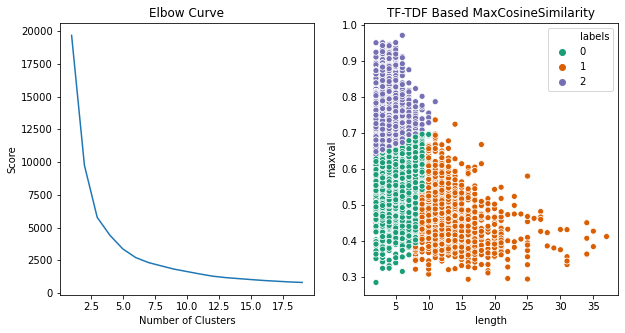

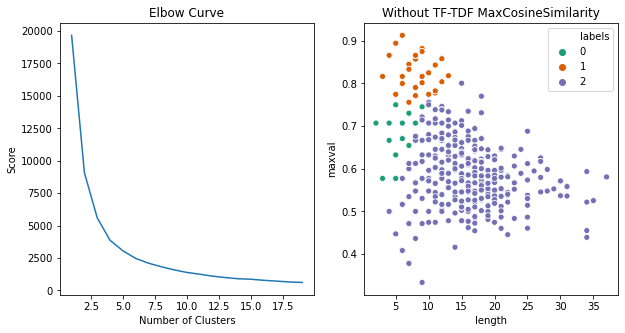

In [93]:
finals=[cosine_sim,cosine_sim1]
f=0
for i in finals:
    rmax=np.amax(i,1)
    imax=np.argmax(cosine_sim1, axis=1)
    maxindex=list(enumerate(imax))
    Maxdf=pd.DataFrame(maxindex,columns=['rindex','cindex'])
    Maxdf['maxval']=rmax
    data4 = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/groceries.csv',sep='\n',header=None)[0].str.split(',')
    data4=data4.reset_index().rename({'index':'rows',0:'Items1'},axis=1)
    Mergedf=Maxdf.merge(data4,left_on='cindex',right_on='rows')
    Mergedf['Items2']=Mergedf['rindex'].apply(lambda x: data4.iloc[x,1])
    z=lambda a,b: list(set(a).union(set(b))) 
    Mergedf['combined']=Mergedf.apply(lambda x: z(x.Items1,x.Items2),axis=1)
    Mergedf['length']=Mergedf.combined.apply(lambda x:len(x))
    review_data_mod = Mergedf[['length','maxval']]
    review_data_std = stats.zscore(review_data_mod)
    review_data_std = np.array(review_data_std)
    number_of_clusters = range(1,20)
    kmeans = [KMeans(n_clusters=i, max_iter=1000, random_state=42) for i in number_of_clusters]
    score = [-1*kmeans[i].fit(review_data_std).score(review_data_std) for i in range(len(kmeans))]
    k_means_test = KMeans(n_clusters=3, max_iter=1000, random_state=42)
    -1*k_means_test.fit(review_data_std).score(review_data_std)
    Mergedf['labels'] = k_means_test.labels_
    fig, axes = plt.subplots(1, 2,figsize=(10,5))
    axes[0].plot((number_of_clusters), score)
    axes[0].set_xlabel('Number of Clusters')
    axes[0].set_ylabel('Score')
    axes[0].set_title('Elbow Curve')
    
    
    sns.scatterplot('length','maxval',data=Mergedf,hue='labels',ax=axes[1],palette='Dark2',sizes=(180,180))
    
    if(f==0):
        axes[1].set_title('TF-TDF Based MaxCosineSimilarity')
        f=1
    else:
        axes[1].set_title('Without TF-TDF MaxCosineSimilarity')
    
    plt.show()

    
    

 **KMC Observations:Best Clustering is done by TF-IDf based CosineSimilar Matrix**

- **As per the elbow Curve** There can be 3 to 7 clusters that can be targetted depending on resources of the Retailer or Grocery Store to group the items for placements,Discounts and Different Combo offers


 **KMC Clusters(with 3 clusters):**

- Label0: Highest Selling items 10 No.s with cosinescore between >0.70
- Label1: Moderate Selling items 10 No.s with cosine scores<0.7
- Label2: Low selling items which are not included in above 20 items list and have cosine scores<0.7

 **Final Observations:**

- **TF-IDF Algorithm** based analysis gives the best rules for the dataset
- There can be number of strategies that can be worked out based on 3 to 7 clusters from **TF-IDF or Apriori to increase Sales, depending on the resources of the Grocery Store or Retailer**
- These strategies are based on Number of Items in a Transaction and their corresponding Cosine values or good associations based on performance.
- A strategy can be to offer dicount on additional purchase of combos with 2 items for transactions upto 5 items with cosine Values>0.7 but cosine values<0.8
- All the Items that belong to Similar clusters must be placed together and offered Discounts on them with Combo offers.
- New Variants of the Highest Selling Items must be introduced to retain customer attraction

<a name = Section9></a>

---
# **9. Conclusion**
---

- There are a couple of **strategies** ,that this Grocery Store can **adopt** to increase sales.*

- They need to **consider** the **allocation** of Items based on High Associations and CosineSimilarity.

- **Promotional discounts** in either of the **associated items** can entice customers to increase Sales.

- Placing  **items close to 10% CosineDifference counter can be a good strategy** to increase sales of relative low selling items and introducing Product Variants of High Selling Items.
 
**Note:**

- More Data is required to bring in more Insights